In [1]:
import pandas as pd

database = "../class2/sqlResult.csv"

sample = pd.read_csv(database, encoding="gb18030")
content = sample.fillna('')    #填充缺失值

news_content = content["content"].tolist()
news_content[0]



'此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/体验版内测，稳定版暂不受影响），以确保工程师可以集中全部精力进行系统优化工作。有人猜测这也是将精力主要用到MIUI 9的研发之中。\r\nMIUI 8去年5月发布，距今已有一年有余，也是时候更新换代了。\r\n当然，关于MIUI 9的确切信息，我们还是等待官方消息。\r\n'

In [2]:
import jieba
def cut(string): return ' '.join(jieba.cut(string))

import re
def tokens(string):
    return re.findall(r'[\d|\w]+',string)   #return: List

news_content = [tokens(i) for i in news_content]
news_content = ["".join(n) for n in news_content]
news_content = [cut(i) for i in news_content]

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.744 seconds.
Prefix dict has been built succesfully.


In [3]:
news_content[0]

'此外 自 本周 6 月 12 日起 除 小米 手机 6 等 15 款 机型 外 其余 机型 已 暂停 更新 发布 含 开发 版 体验版 内测 稳定版 暂不受 影响 以 确保 工程师 可以 集中 全部 精力 进行 系统优化 工作 有人 猜测 这 也 是 将 精力 主要 用到 MIUI9 的 研发 之中 MIUI8 去年 5 月 发布 距今已有 一年 有余 也 是 时候 更新换代 了 当然 关于 MIUI9 的 确切 信息 我们 还是 等待 官方消息'

In [23]:
# with open("./news_content_cut.txt","w") as f:
#     for i in news_content:
#         f.write(i + "\n")
        
#这里保存的txt文件的编码格式不是utf-8导致在后面的LineSentence("news_content_cut.txt")中
#报错，所以可以再notepad++中将文件的编码格式转为utf-8. 后续运行不报错。

In [4]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence

model = Word2Vec(LineSentence("news_content_cut.txt"), size = 35, workers =8) #这个wokers是啥意思

model.most_similar("葡萄牙", topn = 20)

/home/chenshixin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
/home/chenshixin/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('意大利', 0.8875762224197388),
 ('克罗地亚', 0.8551406264305115),
 ('捷克', 0.8491958379745483),
 ('拉脱维亚', 0.820766031742096),
 ('奥地利', 0.8190098404884338),
 ('秘鲁', 0.8130990266799927),
 ('摩洛哥', 0.8091963529586792),
 ('乌拉圭', 0.8089627623558044),
 ('巴林', 0.8084477186203003),
 ('西班牙', 0.8008774518966675),
 ('丹麦', 0.7953639030456543),
 ('罗马尼亚', 0.7953068614006042),
 ('比利时', 0.7880202531814575),
 ('中国香港', 0.7801370620727539),
 ('马德里', 0.7782034277915955),
 ('瑞典', 0.7738786935806274),
 ('瑞士', 0.7731297016143799),
 ('巴塞罗那', 0.7690721154212952),
 ('比什凯克', 0.7638555765151978),
 ('保加利亚', 0.7631879448890686)]

In [5]:
model.most_similar("科比", topn = 20)

/home/chenshixin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/home/chenshixin/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('斯布鲁克', 0.8481124043464661),
 ('切', 0.8299547433853149),
 ('格里芬', 0.8192084431648254),
 ('少帅', 0.8102753162384033),
 ('加内特', 0.8096103668212891),
 ('库里', 0.8057085275650024),
 ('勒布朗', 0.8056958913803101),
 ('吉尔伯特', 0.8055571913719177),
 ('奥尼尔', 0.79831862449646),
 ('李根', 0.7962425351142883),
 ('格列', 0.7958081960678101),
 ('乔丹', 0.791956901550293),
 ('汤普森', 0.791109561920166),
 ('手下', 0.7898923754692078),
 ('搭档', 0.7875261306762695),
 ('老妇人', 0.7859230041503906),
 ('拉诺', 0.785190224647522),
 ('战袍', 0.7850333452224731),
 ('赞', 0.7842385768890381),
 ('萨特', 0.7836986780166626)]

In [6]:
model.most_similar("习近平", topn = 20)

/home/chenshixin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/home/chenshixin/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('总书记', 0.8244127631187439),
 ('李克强', 0.7387132048606873),
 ('习', 0.7343681454658508),
 ('邓小平', 0.7113763689994812),
 ('张德江', 0.7058411836624146),
 ('一国两制', 0.6850860714912415),
 ('张高丽', 0.6791467070579529),
 ('语重心长', 0.6724042296409607),
 ('贺信', 0.6711000204086304),
 ('金砖', 0.6683613657951355),
 ('俞正声', 0.6670675873756409),
 ('建院', 0.6640803217887878),
 ('治国', 0.6617600917816162),
 ('诚心诚意', 0.65860915184021),
 ('日习', 0.657203733921051),
 ('芬兰共和国', 0.6567333340644836),
 ('香港特别行政区', 0.6526504158973694),
 ('五通', 0.6494717597961426),
 ('肝胆相照', 0.648052453994751),
 ('会晤', 0.6445796489715576)]

In [7]:
model.most_similar("说", topn = 20)

/home/chenshixin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/home/chenshixin/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('表示', 0.9109174013137817),
 ('认为', 0.8628321886062622),
 ('指出', 0.8461405038833618),
 ('看来', 0.8032969832420349),
 ('介绍', 0.7769722938537598),
 ('坦言', 0.7527765035629272),
 ('称', 0.7485034465789795),
 ('说完', 0.7466751337051392),
 ('告诉', 0.7411064505577087),
 ('明说', 0.7196474075317383),
 ('透露', 0.7043585181236267),
 ('强调', 0.7012259364128113),
 ('文说', 0.6771715879440308),
 ('中说', 0.6768624186515808),
 ('所说', 0.6637851595878601),
 ('建议', 0.6606339812278748),
 ('时说', 0.6353334784507751),
 ('提到', 0.614168107509613),
 ('相信', 0.6139647364616394),
 ('纳说', 0.6059881448745728)]

In [ ]:
#由于预料有限，所以比较靠后面的答案比较离谱，语料库越大，所给出的most_similar越靠谱。若将wiki百科作为
#语料库，则结果会好很多。

In [8]:
from collections import defaultdict
#这里变成了之前学习过的搜索问题，即给出words,找出在model中与之意思相近的词。
#注意主要是想获得，与所给的words相近的那写词的出现的次数。
def get_related_words(words,model):
    """
    @words:  the words that we're already kown
    @model: the word2vec model
    """
    unseen = words
    seen = defaultdict(int)
    
    max_size = 500
    #因为这个unseen会很大，所以对while循环的次数进行次数的限制。
    while unseen and len(seen) <= max_size:   
        node = unseen.pop(0)
        new_expanding = [w for w,n in model.most_similar(node,topn = 20)]
        unseen += new_expanding
        seen[node] += 1   #实则是个打分机制，只不过这是是用了出现次数代替，认为出现在topn中出现次数越多，关系越大
        """
        Two aspects can be improved:
        optiaml1: the score function can be revised
        optimal2: using dynamic programming to reduce the computing time
        
        """
    return seen
    


In [9]:
len(model.wv.vocab)

99789

In [10]:
related_words = get_related_words(["说","表示"],model)
related_words

/home/chenshixin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  app.launch_new_instance()
/home/chenshixin/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


defaultdict(int,
            {'OECD': 1,
             '一再表示': 2,
             '一反常态': 2,
             '一峰': 5,
             '一说': 6,
             '一贯': 6,
             '上称': 3,
             '下发': 1,
             '不在意': 3,
             '与其说': 2,
             '专员': 1,
             '专家建议': 5,
             '专访': 3,
             '东升': 5,
             '两党': 6,
             '中信集团': 1,
             '中共中央台办': 1,
             '中国工商银行': 1,
             '中来': 1,
             '中称': 36,
             '中说': 45,
             '主任': 7,
             '主任委员': 1,
             '主张': 1,
             '之外': 1,
             '了解': 6,
             '事实上': 4,
             '互相理解': 2,
             '亚当': 1,
             '交管局': 1,
             '人力资源部': 1,
             '人才济济': 1,
             '介绍': 51,
             '他称': 3,
             '令': 4,
             '以及': 1,
             '以往': 1,
             '伊戈尔': 2,
             '会同': 1,
             '估算': 1,
             '估计': 9,
             '但是': 4,
             '佐证': 3,
   

In [11]:
sorted(related_words.items(), key = lambda x:x[1], reverse = True) #根据出现次数进行排序。

[('说', 90),
 ('认为', 88),
 ('表示', 83),
 ('透露', 77),
 ('坦言', 75),
 ('指出', 71),
 ('称', 64),
 ('提到', 52),
 ('介绍', 51),
 ('告诉', 48),
 ('看来', 45),
 ('中说', 45),
 ('强调', 42),
 ('明说', 40),
 ('特别强调', 40),
 ('所说', 38),
 ('提及', 38),
 ('中称', 36),
 ('说完', 35),
 ('文说', 34),
 ('普遍认为', 34),
 ('建议', 32),
 ('表明', 24),
 ('如是说', 22),
 ('直言', 21),
 ('说道', 21),
 ('相信', 20),
 ('时说', 18),
 ('解释', 18),
 ('时称', 18),
 ('呼吁', 17),
 ('知情', 17),
 ('称赞', 16),
 ('深有体会', 16),
 ('写道', 16),
 ('证实', 14),
 ('重申', 14),
 ('问', 13),
 ('嚷嚷', 12),
 ('提出', 12),
 ('副', 12),
 ('地说', 12),
 ('谈论', 12),
 ('说明', 12),
 ('称该', 11),
 ('纳说', 10),
 ('还称', 10),
 ('接受', 10),
 ('反复强调', 10),
 ('而言', 9),
 ('詹启敏', 9),
 ('估计', 9),
 ('引用', 9),
 ('声称', 9),
 ('给出', 9),
 ('司', 8),
 ('问过', 8),
 ('言', 8),
 ('努钦称', 8),
 ('简短', 8),
 ('说文', 8),
 ('回答', 8),
 ('来说', 7),
 ('获悉', 7),
 ('主任', 7),
 ('办原', 7),
 ('听说', 7),
 ('墨方', 7),
 ('称梅', 7),
 ('居心', 7),
 ('的话', 7),
 ('常务', 7),
 ('具名', 7),
 ('求证', 7),
 ('米伦', 7),
 ('敦促', 7),
 ('明确提出', 7),
 ('说出', 7),
 ('确信', 

In [12]:
related_words = get_related_words(["说"],model)

sorted(related_words.items(), key = lambda x: x[1], reverse = True)

/home/chenshixin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  app.launch_new_instance()
/home/chenshixin/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('说', 74),
 ('认为', 74),
 ('表示', 68),
 ('透露', 63),
 ('坦言', 62),
 ('指出', 59),
 ('称', 53),
 ('提到', 44),
 ('介绍', 43),
 ('告诉', 40),
 ('看来', 38),
 ('中说', 37),
 ('强调', 35),
 ('明说', 33),
 ('特别强调', 33),
 ('所说', 32),
 ('提及', 31),
 ('中称', 30),
 ('说完', 29),
 ('普遍认为', 29),
 ('文说', 28),
 ('建议', 27),
 ('表明', 20),
 ('直言', 18),
 ('说道', 18),
 ('如是说', 18),
 ('相信', 17),
 ('时说', 15),
 ('解释', 15),
 ('呼吁', 14),
 ('称赞', 14),
 ('时称', 14),
 ('知情', 14),
 ('深有体会', 13),
 ('写道', 13),
 ('证实', 12),
 ('重申', 12),
 ('谈论', 11),
 ('问', 11),
 ('说明', 11),
 ('嚷嚷', 10),
 ('提出', 10),
 ('副', 10),
 ('地说', 10),
 ('称该', 9),
 ('纳说', 8),
 ('而言', 8),
 ('还称', 8),
 ('接受', 8),
 ('估计', 8),
 ('反复强调', 8),
 ('声称', 8),
 ('司', 7),
 ('问过', 7),
 ('言', 7),
 ('詹启敏', 7),
 ('引用', 7),
 ('确信', 7),
 ('回答', 7),
 ('给出', 7),
 ('来说', 6),
 ('获悉', 6),
 ('主任', 6),
 ('办原', 6),
 ('听说', 6),
 ('墨方', 6),
 ('称梅', 6),
 ('居心', 6),
 ('的话', 6),
 ('常务', 6),
 ('具名', 6),
 ('求证', 6),
 ('米伦', 6),
 ('敦促', 6),
 ('明确提出', 6),
 ('努钦称', 6),
 ('简短', 6),
 ('说文', 6),
 ('说出', 6),
 

In [13]:
print(type(related_words))

<class 'collections.defaultdict'>


## TFIDF Key words

#### What is TFIDF, lick the link https://www.cnblogs.com/pinard/p/6693230.html ,and watch
#### viedo carefully

In [14]:
content.head()


,id,author,source,content,feature,title,url
0,89617,,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


In [15]:
def document_frequency(words):
    
    return sum(1 for n in news_content if words in n) #这里news_content是全局变量，直接用
document_frequency("小米")


100

In [16]:
document_frequency("华为")

194

In [17]:
document_frequency("的")

70342

In [18]:
import math

all_length = len(news_content)
def idf(words):     #idf: inverse document frequency
    """
    @get the inverse document frequency
    """
    return math.log10(all_length/document_frequency(words))



In [19]:
idf("小米")

2.9523613237924735

In [20]:
idf("小米") > idf("的")

True

In [21]:
def tf(words,document):
    """
    @get the term frequency 
    """
    all_words = document.split()  #都已经分好词了，词与词之间都有空格直接split即可
    return sum(1 for i in all_words if i == words)


In [22]:
news_content[19]


'提示 声明 本文 涉及 的 行业 及 个股 分析 来源于 券商 研究 报告 仅为 分析 人士 对 该 行业 及 个股 的 个人观点 不 代表 中证网 观点 不 作为 投资者 买卖 股票 的 依据 股市 有 风险投资 须 谨慎 1 汽车 及 零部件 行业 2017 年 中期 策略 分化 凸显 领军 自主 电动 智能 贯穿 汽车 变革 报告 摘要 整车 预计 下半年 回暖 同时 自主 分化 趋势 延续 上半年 乘用车 整体 表现 偏淡前 5 月 同比 增长 32 增速 放缓 的 主要 原因 在于 购置税 优惠政策 调整 导致 部分 需求 预支 以及 部分 消费 人群 热情 削弱 预计 下半年 乘用车 销量 回升 全年 增速 有望 实现 57 主要 在于 1 中长期 居民 购买力 持续 攀升 将 保持 市场 消费力 和 意愿 维持 旺盛 状态 2 短期 75 的 购置税 优惠政策 仍 有 刺激作用 同时 前 5 月 自主 品牌 依旧 强势 市占率 较 2016 年底 再 提升 1pp 一线 自主 如 吉利 上汽 自主 广汽 自主 前 5 月 累计 销量 增速 分别 达 8911961 远高于 整体 增速 更 强于 二 三线 自主 由于 一线 自主 竞争力 强且 乘用车 市场 短期 不会 恢复 火爆 局面 我们 认为 这一 阶段 自主 品牌 分化 将 延续 竞争 格局 将 更 明朗 零部件 自主 共振 和 国产 替代 的 成长 路径 将 更 清晰 自主 共振 型 的 零部件 厂商 因为 各类 原因 发展 历程 相对 缓慢 但 由于 配套 近年 崛起 迅速 的 领军 自主 从而 销量 利润 进而 研发 管理 都 将 得到 快速 提升 经过 升级 迭代 将 直面 三资 竞争对手 这个 路径 上 配套 量 绑定 快速 成长 的 自主 车企 和 单车 配套 价值量 方面 专注 于 高附加值 零部件 能 得以 提升 零部件 商将 更为 受益 国产 替代 型 的 零部件 厂商 一般 早年 在 合资 车企 或 大型 三资 一级 供应商 的 扶持 下 供应 合资 车企 数年 以来 研发 管理体系 都 逐渐 健全 其中 的 佼佼者 不仅 可以 对内 继续 拓展 自主 客户 对外 还 可以 继续 向 海外 客户 延伸 由于 同时 具备 技术实力 成本 优势 中国 企业 独特 的 灵活性 成功

In [23]:
tf("汽车",news_content[19])

14

In [24]:
tf("驾驶",news_content[19])

4

In [25]:
def get_keys_of_a_document(document):
    """
    @Get keys words of the given documents. Great!
    """
    all_words = set(document.split())
    TFIDF=[  
        (w,tf(w,document) * idf(w)) for w in all_words
    ]
    
    return sorted(TFIDF, key=lambda x:x[1], reverse = True)

In [26]:
get_keys_of_a_document(news_content[1])[:30]
    

[('骁龙', 14.28860032832347),
 ('Windows10', 12.14781401040159),
 ('桌面', 8.674990450316585),
 ('高通', 6.392972936239964),
 ('835', 6.363018624300659),
 ('微软', 5.379820468124088),
 ('835Win10', 4.9523613237924735),
 ('biglittle', 4.9523613237924735),
 ('CPUGPU', 4.9523613237924735),
 ('二合一', 4.9523613237924735),
 ('性能', 4.756660112129509),
 ('Wintel', 4.651331328128492),
 ('源码', 4.651331328128492),
 ('屏蔽掉', 4.651331328128492),
 ('基带', 4.475240069072811),
 ('SoC', 4.475240069072811),
 ('Exynos', 4.350301332464511),
 ('Q4', 4.17421007340883),
 ('联发科', 4.107263283778217),
 ('ARM', 4.04927133680053),
 ('PCB', 3.9981188143531488),
 ('华硕', 3.9523613237924735),
 ('平台', 3.8983153086735953),
 ('功耗', 3.6301420290585544),
 ('惠普', 3.6099386429702673),
 ('蓝牙', 3.5721500820808676),
 ('麒麟', 3.4472113454725677),
 ('WiFi', 3.3503013324645115),
 ('处理器', 3.280263465856756),
 ('方案', 3.105375204622871)]

In [27]:
news_content[1]

'骁龙 835 作为 唯一 通过 Windows10 桌面 平台 认证 的 ARM 处理器 高通 强调 不会 因为 只 考虑 性能 而 去 屏蔽掉 小 核心 相反 他们 正 联手 微软 找到 一种 适合 桌面 平台 的 兼顾 性能 和 功耗 的 完美 方案 报道 称 微软 已经 拿到 了 一些 新 的 源码 以便 Windows10 更好 地 理解 biglittle 架构 资料 显示 骁龙 835 作为 一款 集成 了 CPUGPU 基带 蓝牙 WiFi 的 SoC 比 传统 的 Wintel 方案 可以 节省 至少 30 的 PCB 空间 按计划 今年 Q4 华硕 惠普 联想 将 首发 骁龙 835Win10 电脑 预计 均 是 二合一 形态 的 产品 当然 高通 骁龙 只是 个 开始 未来 也许 还 能 见到 三星 Exynos 联发科 华为 麒麟 小米 澎湃 等 进入 Windows10 桌面 平台'

In [28]:
#在前面加上%prun 可以观察到是什么环节使得程序运行的比较慢！ Great!
%prun machine_key_words = get_keys_of_a_document(news_content[101])

In [25]:
news_content[101]

'中国 经济网 6 月 23 日讯 记者 刘瑾 日前 中国 机械 工业 百强 企业 汽车 三十 强 企业名单 出炉 在 由 中国 机械 工业 联合会 中国汽车工业协会 主办 的 中国 机械 工业 百强 企业 汽车 工业 三十 强 企业 信息 发布会 上 中国 机械 工业 联合会 会长 王瑞祥 指出 入围 企业 总体 呈现 了 持续增长 态势 2016 年 总 规模 平均 规模 均 创新 高 我国 机械 工业 总体 上 呈现 稳中 向 好 的 发展 态势 主要 经济指标 出现 恢复性 增长 同时 王瑞祥 也 表示 机械 工业 长期 积累 的 结构性 矛盾 还 没有 根本性 改变 新 的 发展 业态 发展 模式 远 未 形成 保持 平稳 健康 发展 的 基础 还 不 牢固 产业 升级 新旧 动能 转换 实现 由大 变强 任重道远 相关 数据 显示 2016 年 机械 百强 入围 企业 规模 是 154 亿元 比 上年 略 高 总 规模 达到 16992 亿元 平均 规模 16992 亿元 两项 均 创新 高 相比 前 两年 的 前十强 排名 名单 基本 没有 什么 变化 只是 工程 机械行业 的 徐工 三 一 和 中联重科 由于 之前 市场 环境 等 原因 整体 排位 后移 了 一 两位 但 仍 全部 在 十强 之列 但 考虑 到 工程 机械行业 最近 以来 的 强烈 增长 态势 明年 该 行业 整体 恢复性 可能 较大 中机联 执行 副会长 陈斌 表示 机械 百强 的 年 换位 率 2005 年 曾 高达 32 此后 逐年 下降 2012 年降 至 6 不过 近几年 又 在 上升 2016 年 升至 22 说明 市场 动荡 不 确定 因素 增加 根据 中机联 公布 的 数据 2017 年 1 至 5 月 机械 增加值 增速 好于 去年 但 呈现 逐月 回落 的 态势 比如 1 至 5 月 增速 为 107 比 1 至 4 月 回落 02 点 此外 利润总额 也 出现 了 同样 的 走势 专家 分析 这是 由于 钢铁 等 原材料 价格 近期 出现 较大 增幅 使得 工业 企业 成本 压力 增大 产量 同比 增长 表现 抢眼 的 是 工程 机械类 产品 已经 有 8 个 月 保持高速 增长 同时 陈斌 也 表示 了 担忧 比如 价格指数 缓慢 回升 但远 低于 工业 原材

In [27]:
machine_key_words = get_keys_of_a_document(news_content[101])

In [29]:
machine_key_words[:30]

[('机械', 19.73268423154147),
 ('工业', 13.726799287798574),
 ('百强', 12.218936930008129),
 ('机械行业', 11.732905915902746),
 ('16992', 9.904722647584947),
 ('王瑞祥', 9.904722647584947),
 ('中机联', 9.904722647584947),
 ('增速', 8.057368905265053),
 ('态势', 7.971371787277901),
 ('恢复性', 6.867694767829172),
 ('规模', 6.861746056315247),
 ('回落', 6.643121992377128),
 ('增长', 6.604587773896507),
 ('企业', 6.260042817487905),
 ('陈斌', 5.9311791790524575),
 ('呈现', 5.279381611367784),
 ('原材料', 5.215938100214726),
 ('但远', 4.9523613237924735),
 ('刘瑾', 4.651331328128492),
 ('三十', 4.6438668975349),
 ('入围', 4.629743188559925),
 ('钢铁', 4.588699854270723),
 ('回升', 4.553165964236777),
 ('联合会', 4.4415451172114695),
 ('行业', 4.255767796223267),
 ('后移', 4.253391319456455),
 ('前十强', 4.253391319456455),
 ('发展', 4.24347205022841),
 ('亿元', 4.194707226838383),
 ('相当规模', 4.17421007340883)]

## Word cloud
#### Some basic usage of wordcloud package, see https://www.jianshu.com/p/daa54db9045d

In [30]:
import wordcloud
# Word Cloud can show Chinese by SourceHanSerifSC-Regular.otf 
# background_color parameter can set the color of background
wc = wordcloud.WordCloud("./SourceHanSerifSC-Regular.otf",background_color="pink")
import matplotlib.pyplot as plt
%matplotlib inline

machine_key_words_dict = {w:n for w,n in machine_key_words}
machine_key_words_dict

{'02': 1.4938745599942669,
 '1': 0.3482445783310308,
 '107': 2.46948774018372,
 '154': 2.7322532357524185,
 '16992': 9.904722647584947,
 '2005': 2.5083165278743973,
 '2012': 1.9615786319893358,
 '2016': 2.544442318779452,
 '2017': 0.2022079149439319,
 '22': 1.1286915105243371,
 '23': 1.0891574647638442,
 '32': 1.5565109477736925,
 '4': 0.28504848849750936,
 '5': 0.5511525867465362,
 '6': 0.7622602583437212,
 '8': 0.5787505954795427,
 '一': 0.4738860023948346,
 '一定': 1.4890657138304708,
 '三': 0.679197945380128,
 '三十': 4.6438668975349,
 '上': 0.7073166822180775,
 '上升': 1.7662529439792682,
 '上年': 2.4796048744752612,
 '下行': 2.350301332464511,
 '下降': 1.7073424530547205,
 '不': 1.0069391592825077,
 '不过': 1.4432932787753119,
 '专家': 1.3543372514582839,
 '业态': 2.4021329707373793,
 '两位': 2.112255229335716,
 '两年': 1.6603268877977373,
 '两项': 2.46948774018372,
 '个': 0.5035468301229501,
 '中': 0.1718711925167735,
 '中国': 2.916562674260681,
 '中国汽车工业协会': 3.6513313281284923,
 '中机联': 9.904722647584947,
 '中联重

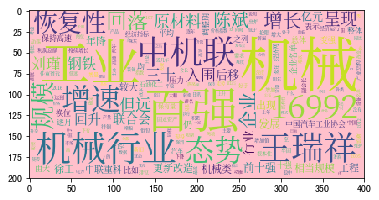

In [31]:
plt.imshow(wc.generate_from_frequencies(machine_key_words_dict))

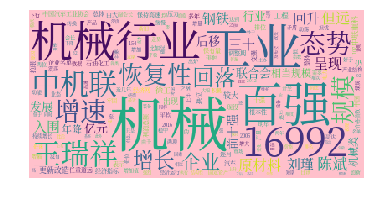

In [32]:
plt.imshow(wc.generate_from_frequencies(machine_key_words_dict))
plt.axis("off")  #remove the axis
plt.show()

In [33]:
letv_news = news_content[29]


In [35]:
letv_news_keywords = get_keys_of_a_document(letv_news)
letv_news_keywords[:50]

[('乐视', 176.99760575485513),
 ('贾跃亭', 120.8314818649659),
 ('孙宏斌', 52.20361598957413),
 ('裁员', 44.992995189456614),
 ('减持', 43.152215435999146),
 ('视网', 29.04017525402759),
 ('体系', 27.297305240544585),
 ('非上市', 22.3314744144852),
 ('持股', 19.017830138194473),
 ('离职', 18.79690432950363),
 ('称乐视', 16.19708534720212),
 ('员工', 15.44606886211385),
 ('亿元', 13.982357422794609),
 ('周刊', 13.88135032368396),
 ('手机', 13.744777595309474),
 ('2645', 13.050903997393533),
 ('世茂工', 12.522630220226489),
 ('乐', 12.23618842725544),
 ('公司', 11.98032187333084),
 ('万部', 11.85708397137742),
 ('上市', 11.204566493134546),
 ('家族', 11.107895240630421),
 ('无息', 10.829815928910802),
 ('董事会', 10.400715222724445),
 ('乐视致', 9.904722647584947),
 ('半条命', 9.904722647584947),
 ('大规模', 9.693408132506406),
 ('消息', 9.633753007701436),
 ('刘步尘', 9.302662656256985),
 ('百亿元', 9.23190018120232),
 ('比例', 9.205494050667042),
 ('但是', 9.138561944155832),
 ('蒙眼', 8.950480138145622),
 ('对乐视', 8.950480138145622),
 ('被', 8.874028993523604

In [36]:
#Keywords were showed in the shape of mask(pictures obtained by ourselves)
from PIL import Image
import numpy as np
sence_mask = np.array(Image.open("./timg.jpeg"))
wordcloud_with_mask = wordcloud.WordCloud(
font_path = "./SourceHanSerifSC-Regular.otf",
mask = sence_mask,
background_color="grey"
)


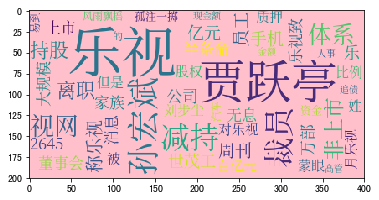

In [34]:
plt.imshow(wc.generate_from_frequencies({n:score for n, score in letv_news_keywords[:50]}))

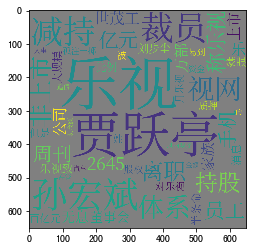

In [37]:
plt.imshow(wordcloud_with_mask.generate_from_frequencies({n:score for n, score in letv_news_keywords[:50]}))

## TFIDF vertorized
#### 利用不同文档的TFIDF向量来判断两个文档之间的相似性（可以这么做但是感觉不是很准，可能是语料库比较小的原因）。
##### 要用到scikit-learn包（重要的机器学习的包），该包的中文文档地址： http://sklearn.apachecn.org/#/

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

documents_num = 50000
sub_news_content = news_content[:documents_num] #所给的CSV文件中共有8W多个文章，这里取其中的5万多个
# TfidfVectorizer().fit_transform(arg)  arg为分好词的list。
vertorized = TfidfVectorizer(max_features=10000)  #只计算出现频率最高的10000个单词的tfidf值
tfidf = vertorized.fit_transform(sub_news_content)
# tfidf = TfidfVectorizer().fit_transform(sub_news_content) 
tfidf.shape  #（50000,217953）  有5W个文章，217953个词

(50000, 10000)

In [39]:
vertorized.vocabulary_

{'此外': 6208,
 '本周': 5905,
 '12': 33,
 '日起': 5626,
 '小米': 3990,
 '手机': 4891,
 '15': 46,
 '其余': 1866,
 '暂停': 5752,
 '更新': 5774,
 '发布': 2657,
 '开发': 4422,
 '影响': 4541,
 '确保': 7345,
 '工程师': 4149,
 '可以': 2760,
 '集中': 9630,
 '全部': 1765,
 '精力': 7670,
 '进行': 9144,
 '工作': 4129,
 '有人': 5822,
 '猜测': 6886,
 '主要': 941,
 '研发': 7326,
 '之中': 962,
 '去年': 2577,
 '一年': 330,
 '时候': 5642,
 '当然': 4521,
 '关于': 1841,
 '信息': 1567,
 '我们': 4817,
 '还是': 9087,
 '等待': 7615,
 '作为': 1462,
 '唯一': 2989,
 '通过': 9252,
 '平台': 4272,
 '认证': 8558,
 '处理器': 3353,
 '强调': 4497,
 '不会': 578,
 '因为': 3067,
 '考虑': 7986,
 '性能': 4658,
 '核心': 6081,
 '相反': 7217,
 '他们': 1269,
 '联手': 8026,
 '微软': 4595,
 '找到': 4961,
 '一种': 372,
 '适合': 9196,
 '兼顾': 1886,
 '完美': 3800,
 '方案': 5550,
 '报道': 5037,
 '已经': 4173,
 '拿到': 5104,
 '一些': 281,
 '以便': 1285,
 '更好': 5771,
 '理解': 6971,
 '架构': 6035,
 '资料': 8799,
 '显示': 5717,
 '一款': 360,
 '集成': 9637,
 '传统': 1380,
 '节省': 8207,
 '至少': 8137,
 '30': 100,
 '空间': 7506,
 '按计划': 5136,
 '今年': 1244,
 '联想': 8025,
 '首发': 9

In [40]:
sub_news_content[0]

'此外 自 本周 6 月 12 日起 除 小米 手机 6 等 15 款 机型 外 其余 机型 已 暂停 更新 发布 含 开发 版 体验版 内测 稳定版 暂不受 影响 以 确保 工程师 可以 集中 全部 精力 进行 系统优化 工作 有人 猜测 这 也 是 将 精力 主要 用到 MIUI9 的 研发 之中 MIUI8 去年 5 月 发布 距今已有 一年 有余 也 是 时候 更新换代 了 当然 关于 MIUI9 的 确切 信息 我们 还是 等待 官方消息'

In [41]:
tfidf[0] #sparse matrix: 稀疏的矩阵

<1x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 35 stored elements in Compressed Sparse Row format>

In [42]:
tfidf[0].toarray()   #注意这里是[[]]

array([[0., 0., 0., ..., 0., 0., 0.]])

In [43]:
print(type(tfidf[0].toarray()))

<class 'numpy.ndarray'>


In [44]:
tfidf[0].toarray()[0]   #所以要加[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [45]:
print(type(tfidf[0].toarray()[0]))


<class 'numpy.ndarray'>


In [46]:
tfidf[0].toarray()[0][33]   #12的tfidf的值

0.10908782113272168

In [47]:
import numpy as np

np.where(tfidf[0].toarray()) #得到值不为0的位置

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([  33,   46,  330,  941,  962, 1567, 1765, 1841, 1866, 2577, 2657,
        2760, 3990, 4129, 4149, 4422, 4521, 4541, 4817, 4891, 5626, 5642,
        5752, 5774, 5822, 5905, 6208, 6886, 7326, 7345, 7615, 7670, 9087,
        9144, 9630]))

In [48]:
np.where(tfidf[0].toarray()[0])[0]

array([  33,   46,  330,  941,  962, 1567, 1765, 1841, 1866, 2577, 2657,
       2760, 3990, 4129, 4149, 4422, 4521, 4541, 4817, 4891, 5626, 5642,
       5752, 5774, 5822, 5905, 6208, 6886, 7326, 7345, 7615, 7670, 9087,
       9144, 9630])

In [49]:
set(np.where(tfidf[0].toarray()[0])[0])

{33,
 46,
 330,
 941,
 962,
 1567,
 1765,
 1841,
 1866,
 2577,
 2657,
 2760,
 3990,
 4129,
 4149,
 4422,
 4521,
 4541,
 4817,
 4891,
 5626,
 5642,
 5752,
 5774,
 5822,
 5905,
 6208,
 6886,
 7326,
 7345,
 7615,
 7670,
 9087,
 9144,
 9630}

In [50]:
import random
#在前一千个文章中随机取两个
document_id_1, document_id_2 = random.randint(1,1000),random.randint(1,1000)


In [51]:
document_id_1 


17

In [52]:
sub_news_content[document_id_1]

'国歌 法 草案 首次 提请 最高 立法机关 审议 点击 图片 进入 下 一页 新闻 十二届 全国人大常委会 第二十八 次 会议 22 日 首次 开始 审议 国歌 法 草案 草案 对 应当 奏 唱国歌 的 场合 国歌 标准 曲谱 的 审定 发布 和 使用 奏 唱 礼仪 规范 以及 不得 奏 唱 播放 国歌 的 场合 等 做出 规范 草案 规定 在 公共场合 恶意 修改 国歌 歌词 或者 故意 以 歪曲 贬损 方式 奏 唱国歌 损害 国歌 庄严 形象 的 由 公安机关 处以 十五日 以下 拘留 新闻来源 新华社 点评 国歌 代表 了 一个 国家 的 气质 也 是 一个 国家 的 象征 为 国歌 立法 不仅 有助于 推动 实现 国旗 国徽 国歌 等 国家 象征 标志物 立法 的 完整 统一 而且 有助于 纠正 现实 中 存在 的 种种 不 规范 国歌 使用 状况 有力 捍卫 国歌 应有 的 严肃性 和 神圣 性 刘洪滨 代言 假药 月 销售额 近 百万元 点击 图片 进入 下 一页 新闻 近日 一位 名叫 刘洪滨滨 有时 写作 斌 的 老 专家 被 发现 多次 在 各大 电视台 的 健康 医药 节目 中 参与 推广 的 药品 功效 也 是 五花八门 有时 是 苗医 传人 有时 是 蒙医 传人 偶尔 还会 客串 一下 北大 专家 和 医院 退休 的 老 院长 由于 刘洪滨 出现 在 电视 画面 中 的 身份 完全 不同 也 被 网友 戏称 为 虚假 医药 广告 表演艺术家 新闻来源 北京青年报'

In [53]:
document_id_2

328

In [54]:
sub_news_content[document_id_2]

'原 标题 状元 笔记 不过 是 反 常识 的 应试 经济 商家 以 状元 笔记 为 噱头 声称 可以 帮助 考生 提供 捷径 通过 难关 不过 是 发财梦 白日梦 央广网 消息 状元 笔记 学霸 手写 笔记 正 成为 网购 热卖 商品 商家 宣称 本 商品 适合 全国 各省市 敢 吹 这样 的 牛 得 有 多 无知 一名 思维 和 情感 态度 正常 的 学生会 不会 把 自己 的 学习 笔记 卖 给 商家 出售 同样 对 学习 有 正确认识 的 高中生 会 不会 买 别人 的 笔记 以 寻找 捷径 我 都 怀疑 我 没 接触 过 作者 也 没 亲见 笔记 未知 真伪 不 妄作 结论 我 不 太 相信 有人 会 买 但 报道 称有 几千人 付款 购买 还算 好 只有 几千人 善于 学习 的 人 他们 的 态度 和 经验 也许 值得 学习 但 更 有 价值 的 是 学生 对 自己 学力 的 判断 在 学习 过程 的 体验 以及 发现 问题 的 能力 能 知己 优秀 的 学生 他 的 学习 往往 有些 个人 特质 有人 记忆力 强 有人 思辨 能力 强 有人 善于 举一反三 有人 长于 见微知著 有人 习惯于 查漏 补缺 路径 也 不尽相同 有人 以勤补拙 有人 见多识广 有人 善于 思考 每个 人有 自己 的 学习 性格 也 有 不同 的 学习 之道 哪能 靠 一本 别人 所谓 的 状元 笔记 就 通关 再说 即使 那些 笔记 是 真的 也 只能 说 对 作者 本人 起过 作用 谁 要 试图 以此 复制 不大可能 我 以前 看 一些 学生 高三 作业 或是 笔记 会 有 这样 的 印象 到 了 高三 作业 仍然 一丝不苟 书写 依然 工整 笔记 提纲挈领 要言不烦 这样 的 笔记 体现 的 是 良好 的 学习 习惯 只 此 而已 至于 商家 认为 可以 帮助 考生 提供 捷径 通过 难关 不过 是 发财梦 白日梦 应试 经济 早已有之 曾 有 商家 出钱 让 高考状元 在 镜头 前 宣称 自己 服用 了 什么 补 脑液 营养品 不知 出于 何种 原因 有些 学生 为 商家 代言 了 其实 这 对 个人 名誉 是 很大 的 伤害 高考 考出 好 成绩 不是 靠 天分 不是 靠 勤奋 刻苦 竟然 是 靠 服 了 补药 这 岂 不是 对 学生 成绩 的 侮辱 虽然 国家 不

In [55]:
#随机抽取的第三个文章，用tfidf之后的结果来判断，random_choose和id_1，random_choose和id_2的相似度
random_choose = random.randint(1,1000)

random_choose

474

In [56]:
sub_news_content[random_choose]

'尼康 百年 大寿 将 至 至于 玩友 们 关心 的 D820 或者 D850 最近 没什么 消息 而 本月 佳能 EOS6DMarkII 的 小道消息 几乎 每天 都 有 根据 佳能 尼康 两个 大厂 的 过往 相信 尼康 的 新 相机 或许 已经 完成 得 差不多 了 而 传得 最 厉害 的 D8XX 的 级数 相关 信息 基本上 都 不得而知 至于 尼康 何时 会 亮相 这些 产品 不如 反问 佳能 何时 会 出牌 更好 神秘 嘉宾 D820 或者 D850 不知 何时 才能 跟 玩友 们 见面 不过 早前 在 日本 尼康 展出 的 100 周年 限定版 纪念品 终于 公布 定价 事不宜迟 下面 就 来 看看 尼康 Nikon 的 生日 贺礼 些 什么 吧 D5 碳 灰色 百年 限定版 军舰 头 部位 有 尼康 Nikon 成立 100 周年 的 Logo 机身 盖 也 为 百年 限定 款式 建议 售价 为 100 万日元 约 61400 元 普通 版 D5 的 建议 售价 为 75 万日元 D500 碳 灰色 百年 限定版 军舰 头 部位 刻有 尼康 Nikon 成立 100 周年 的 Logo 机身 盖 也 为 百年 限定 款式 建议 售价 为 35 万日元 约 21500 元 普通 版 D500 建议 售价 为 259 万日元 尼康 f28 镜头 百年 限定版 套装 AFSNIKKOR1424mmf28GEDAFSNIKKOR2470mmf28EEDVRAFSNIKKOR70200mmf28EFLEDVR 三款 镜均 采用 碳 灰色 涂装 镜头 印有 尼康 Nikon100 周年 的 官方 Logo 同时 配碳 灰色 的 遮光罩 每套 镜头 均 附有 独立 编号 建议 售价 为 100 万日元 约 61400 元 普通 版 建议 售价 共为 972 万日元 含税 碳 灰色 涂装 的 AFSNIKKOR70200mmf28EFLEDVR 跟 百年纪念 版 的 尼康 D5 或 D500 完美 结合 套装 包括 小黑 七 光学 结构 11 模型 套装 建议 售价 为 50 万日元 约 30700 元 普通 版 镜头 建议 售价 为 3591 万日元 含税 尼康 Nikon100 周年纪念 胸针 套装 连同 小册子 及 相框 套装 建议 售价 为 32800 日

In [57]:

vertors_of_id_1 = tfidf[document_id_1].toarray()[0]
vertors_of_id_2 = tfidf[document_id_2].toarray()[0]



In [58]:
from scipy.spatial.distance import cosine  #scipy包中的判断两个向量之间余弦距离的包

def cosine_distance(v1,v2):
    return cosine(v1,v2)

#test
cosine_distance([1,1],[0,1])     #值越小代表向量夹角越小，距离越近

0.29289321881345254

In [59]:
cosine_distance(tfidf[random_choose].toarray()[0],vertors_of_id_1)


0.9957207235474141

In [57]:
cosine_distance(tfidf[random_choose].toarray()[0],vertors_of_id_2)

0.9983484893021821

In [65]:
#获得与random_choose最相似的文章排序
sorted_res = sorted(list(range(1000)), key = lambda x: cosine_distance(
                        tfidf[random_choose].toarray()[0],tfidf[x].toarray()[0]))
sorted_res

/home/chenshixin/anaconda3/lib/python3.6/site-packages/scipy/spatial/distance.py:644: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


[474,
 2,
 34,
 120,
 19,
 714,
 11,
 65,
 106,
 7,
 91,
 31,
 13,
 52,
 27,
 81,
 87,
 4,
 8,
 64,
 6,
 104,
 58,
 94,
 54,
 18,
 83,
 48,
 29,
 38,
 108,
 14,
 42,
 46,
 21,
 1,
 76,
 90,
 12,
 35,
 93,
 63,
 40,
 72,
 124,
 61,
 101,
 96,
 62,
 0,
 26,
 22,
 113,
 47,
 57,
 36,
 60,
 97,
 44,
 66,
 74,
 16,
 56,
 122,
 5,
 23,
 105,
 123,
 118,
 43,
 84,
 77,
 102,
 112,
 85,
 98,
 86,
 53,
 73,
 116,
 59,
 20,
 82,
 75,
 71,
 119,
 69,
 92,
 110,
 55,
 95,
 80,
 25,
 68,
 70,
 3,
 39,
 109,
 37,
 9,
 67,
 78,
 28,
 125,
 121,
 17,
 30,
 41,
 32,
 79,
 24,
 111,
 114,
 33,
 50,
 99,
 49,
 89,
 10,
 15,
 45,
 51,
 88,
 100,
 103,
 217,
 375,
 205,
 219,
 391,
 711,
 698,
 244,
 303,
 193,
 917,
 299,
 660,
 354,
 635,
 367,
 199,
 868,
 396,
 447,
 936,
 207,
 886,
 616,
 967,
 546,
 910,
 751,
 198,
 347,
 739,
 782,
 871,
 633,
 704,
 680,
 130,
 806,
 939,
 172,
 614,
 880,
 755,
 776,
 369,
 889,
 183,
 944,
 841,
 954,
 664,
 973,
 302,
 346,
 844,
 851,
 887,
 975,
 431,
 150,


In [66]:
sub_news_content[sorted_res[1]]

'此前 的 一加 3T 搭载 的 是 3400mAh 电池 DashCharge 快充 规格 为 5V4A 至于 电池 缩水 可能 与 刘作 虎 所说 一加 手机 5 要 做 市面 最 轻薄 大屏 旗舰 的 设定 有关 按照 目前 掌握 的 资料 一加 手机 5 拥有 55 寸 1080P 三星 AMOLED 显示屏 6G8GBRAM64GB128GBROM 双 1600 万 摄像头 备货 量 惊喜 根据 京东 泄露 的 信息 一加 5 起 售价 是 xx99 元 应该 是 在 279928992999 中 的 某个'

In [67]:
sub_news_content[sorted_res[2]]

'现在 笔者 发现 这 款 产品 已经 众筹 成功 了 众筹 页面 显示 香蕉 电话 总共 筹集 到 36320 美元 完成 众筹 目标 的 115 目前 香蕉 电话 的 官网 已经 正式 接受 预定 虽然 其 并未 公布 售价 不过 按照 众筹 网站 的 筹款 说明 单个 产品 价值 50 美元 值得一提的是 这个 项目 参加 了 大猩猩 保护 项目 承诺 将 销售总额 的 1 将会 捐献 给 GearingUp4Gorillas 为 维龙加 国家 公园 的 护林员 提供 资金 和 设备 保护 稀有 的 山地 大猩猩 虽然 这 款 产品 外形 有点 污 不过 能 保护 动物 还是 让 人 心里 暖暖的'

## Boolen Search

##### 原理虽然简单，但是很巧妙，多看视频，借助Boolen Search 的原理，使得搜索速度大幅度提升



## Bulid a Search Engine
##### input: words
##### output: target documents which contain the input words

In [68]:
#最淳朴的思想，暴力法。但是这种方法得到搜索结果的速度会很慢。
def naive_search(words):
    return [i for i, n in enumerate(sub_news_content) if all(w in n for w in words.split())]

In [69]:
%%timeit   #用来测试程序运行的时间。 结果为六十多毫秒
naive_search("美军 基地 航母")

68.2 ms ± 1.08 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


##### 现在借鉴布尔搜索的思想。看看搜索的速度可以提升多少

In [70]:
tfidf.shape  #50000为文章数目，10000为单词数目。如果将二者调个个则就可以转变为Boolen Search
               #那样的形式，然后再做并集即可得到均含有搜索关键词的那些文章的id了。

(50000, 10000)

In [71]:

bin(39)

'0b100111'

In [72]:
 bin(32)

'0b100000'

In [73]:
#取并集
bin(39 & 32)

'0b100000'

In [74]:
transcoped_tfidf = tfidf.transpose().toarray()

In [75]:
np.where(transcoped_tfidf[0])  
#表示第0个单词在下面的文章中出现，即在这些文章中第0个词的tfidf值不为零

(array([   24,    71,    93,   129,   241,   261,   611,   643,   808,
          826,   837,   882,   970,  1032,  1089,  1130,  1160,  1547,
         1622,  1656,  1671,  1943,  2192,  2394,  2496,  2731,  2849,
         2867,  2880,  2956,  3200,  3223,  3261,  3345,  3367,  3438,
         3541,  3645,  3660,  3902,  3950,  3988,  4061,  4376,  4386,
         4554,  4590,  4686,  4831,  5040,  5229,  5282,  5500,  5695,
         5827,  5862,  6014,  6560,  6829,  6836,  6842,  6847,  6854,
         6859,  7219,  7459,  7495,  7503,  7653,  9115,  9973,  9995,
        10063, 12165, 12216, 12404, 12740, 12744, 13284, 13862, 14797,
        15737, 15763, 15951, 15955, 15959, 15961, 19861, 21408, 24643,
        24662, 24986, 25042, 25274, 25396, 25463, 25548, 25581, 25744,
        25841, 26331, 26629, 26720, 26862, 27589, 29427, 29661, 31106,
        31111, 31162, 31251, 31391, 31417, 31726, 31949, 31998, 32307,
        32445, 32822, 32823, 34623, 36140, 37584, 37682, 37765, 38873,
      

In [76]:
word2id = vertorized.vocabulary_
word2id

{'此外': 6208,
 '本周': 5905,
 '12': 33,
 '日起': 5626,
 '小米': 3990,
 '手机': 4891,
 '15': 46,
 '其余': 1866,
 '暂停': 5752,
 '更新': 5774,
 '发布': 2657,
 '开发': 4422,
 '影响': 4541,
 '确保': 7345,
 '工程师': 4149,
 '可以': 2760,
 '集中': 9630,
 '全部': 1765,
 '精力': 7670,
 '进行': 9144,
 '工作': 4129,
 '有人': 5822,
 '猜测': 6886,
 '主要': 941,
 '研发': 7326,
 '之中': 962,
 '去年': 2577,
 '一年': 330,
 '时候': 5642,
 '当然': 4521,
 '关于': 1841,
 '信息': 1567,
 '我们': 4817,
 '还是': 9087,
 '等待': 7615,
 '作为': 1462,
 '唯一': 2989,
 '通过': 9252,
 '平台': 4272,
 '认证': 8558,
 '处理器': 3353,
 '强调': 4497,
 '不会': 578,
 '因为': 3067,
 '考虑': 7986,
 '性能': 4658,
 '核心': 6081,
 '相反': 7217,
 '他们': 1269,
 '联手': 8026,
 '微软': 4595,
 '找到': 4961,
 '一种': 372,
 '适合': 9196,
 '兼顾': 1886,
 '完美': 3800,
 '方案': 5550,
 '报道': 5037,
 '已经': 4173,
 '拿到': 5104,
 '一些': 281,
 '以便': 1285,
 '更好': 5771,
 '理解': 6971,
 '架构': 6035,
 '资料': 8799,
 '显示': 5717,
 '一款': 360,
 '集成': 9637,
 '传统': 1380,
 '节省': 8207,
 '至少': 8137,
 '30': 100,
 '空间': 7506,
 '按计划': 5136,
 '今年': 1244,
 '联想': 8025,
 '首发': 9

In [77]:
id2word = {n:w for w,n in word2id.items()}
id2word

{6208: '此外',
 5905: '本周',
 33: '12',
 5626: '日起',
 3990: '小米',
 4891: '手机',
 46: '15',
 1866: '其余',
 5752: '暂停',
 5774: '更新',
 2657: '发布',
 4422: '开发',
 4541: '影响',
 7345: '确保',
 4149: '工程师',
 2760: '可以',
 9630: '集中',
 1765: '全部',
 7670: '精力',
 9144: '进行',
 4129: '工作',
 5822: '有人',
 6886: '猜测',
 941: '主要',
 7326: '研发',
 962: '之中',
 2577: '去年',
 330: '一年',
 5642: '时候',
 4521: '当然',
 1841: '关于',
 1567: '信息',
 4817: '我们',
 9087: '还是',
 7615: '等待',
 1462: '作为',
 2989: '唯一',
 9252: '通过',
 4272: '平台',
 8558: '认证',
 3353: '处理器',
 4497: '强调',
 578: '不会',
 3067: '因为',
 7986: '考虑',
 4658: '性能',
 6081: '核心',
 7217: '相反',
 1269: '他们',
 8026: '联手',
 4595: '微软',
 4961: '找到',
 372: '一种',
 9196: '适合',
 1886: '兼顾',
 3800: '完美',
 5550: '方案',
 5037: '报道',
 4173: '已经',
 5104: '拿到',
 281: '一些',
 1285: '以便',
 5771: '更好',
 6971: '理解',
 6035: '架构',
 8799: '资料',
 5717: '显示',
 360: '一款',
 9637: '集成',
 1380: '传统',
 8207: '节省',
 8137: '至少',
 100: '30',
 7506: '空间',
 5136: '按计划',
 1244: '今年',
 8025: '联想',
 9824: '

In [78]:
#看看第33个词，即本周 在哪些文章出现过
set(np.where(transcoped_tfidf[5905])[0])

{0,
 117,
 130,
 162,
 163,
 231,
 237,
 290,
 349,
 725,
 734,
 808,
 810,
 868,
 919,
 975,
 1013,
 1102,
 1136,
 1190,
 1210,
 1219,
 1275,
 1299,
 1332,
 1416,
 1437,
 1454,
 1507,
 1509,
 1516,
 1518,
 1525,
 1577,
 1615,
 1645,
 1649,
 1686,
 1689,
 1696,
 1706,
 1731,
 1760,
 1851,
 1911,
 1917,
 1920,
 1954,
 2028,
 2034,
 2063,
 2072,
 2077,
 2102,
 2120,
 2136,
 2139,
 2144,
 2154,
 2156,
 2165,
 2167,
 2189,
 2205,
 2225,
 2234,
 2289,
 2293,
 2295,
 2297,
 2338,
 2352,
 2356,
 2526,
 2570,
 2714,
 2763,
 2870,
 2872,
 2889,
 3106,
 3114,
 3123,
 3130,
 3139,
 3190,
 3308,
 3311,
 3389,
 3503,
 3530,
 3550,
 3555,
 3577,
 3625,
 3673,
 3683,
 3703,
 3736,
 3746,
 3856,
 3911,
 3970,
 4058,
 4096,
 4168,
 4178,
 4186,
 4189,
 4238,
 4248,
 4279,
 4298,
 4303,
 4338,
 4357,
 4434,
 4459,
 4478,
 4488,
 4677,
 4686,
 4725,
 4937,
 4938,
 4941,
 5050,
 5057,
 5077,
 5184,
 5213,
 5219,
 5244,
 5269,
 5439,
 5441,
 5528,
 5659,
 5661,
 5678,
 5825,
 5850,
 5881,
 5940,
 6080,
 60

![pic](./webwxgetmsgimg.jpg)  #怎么插图片还是不太会，解决一下

In [79]:
from functools import reduce  #class1好像讲过，这个是用来进行连续操作的，这里是连续的并集
from operator import and_   #集

s1, s2, s3 = {2,2,4,1}, {3,4,1,5}, {1,4,5,7,2}
reduce(and_, [s1,s2,s3])  #the second parameter type is list

{1, 4}

In [111]:
def search_engine(query):
    """
    @input: key words
    @output: documents which contain all the key words and ranked by it's tfidf value
    """
    
    key_words = query.split()
    #求出input的tfidf值
    query_tfidf = vertorized.transform(["".join(key_words)]).toarray()[0] 
    candidate_ids = [word2id[w] for w in key_words]
    #为啥这里要设置成一个list呢？因为要用到recduce, reduce的第二个参数得是个list.
    documents_ids = [set(np.where(transcoped_tfidf[i])[0]) for i in candidate_ids]

    merged_documents = reduce(and_, documents_ids)
    sorted_documents_ids = sorted(merged_documents, key=lambda i: cosine_distance(
                                    query_tfidf, tfidf[i].toarray()[0]))
    return sorted_documents_ids
    
    

In [99]:
# %%timeit      #结果显示花费在11.2ms左右，可见用了Boolen Search的思想，搜索速度提高了大概6倍。
search_engine("美军 司令 航母")

{2844, 21484, 21523, 22987}

In [130]:
#Rank the rearch results by the difference of tfidf value.
search_res = search_engine("美军 司令 航母")
search_res

/home/chenshixin/anaconda3/lib/python3.6/site-packages/scipy/spatial/distance.py:644: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


[21484, 21523, 2844, 22987]

In [123]:

#Show the search results 
for i,document_ids in enumerate(search_res):
    print("## Search result {}".format(i+1))
    print(content["content"][document_ids]+ "\n")

## Search result 1
　　新华社洛杉矶４月８日电（记者黄恒）美国第三舰队８日发布声明说，该舰队下属的“卡尔·文森”航母战斗群当天离开新加坡，改变原定驶往澳大利亚的任务计划，转而北上，前往西太平洋朝鲜半岛附近水域展开行动。\n　　该舰队网站主页发布的消息说，美军太平洋司令部司令哈里·哈里斯指示“卡尔·文森”航母战斗群向北航行。这一战斗群包括“卡尔·文森”号航空母舰、海军第二航空队、两艘“阿利·伯克”级导弹驱逐舰和一艘“泰孔德罗加”级导弹巡洋舰。\n　　“卡尔·文森”号航母的母港位于美国加利福尼亚州的圣迭戈，今年１月初前往西太平洋地区执行任务，并参与了日本及韩国的军事演习。\n　　美国有线电视新闻网援引美国军方官员的话说，“‘卡尔·文森’号此次行动是为了对近期朝鲜的挑衅行为作出回应”。（完）

## Search result 2
\n新华社洛杉矶4月8日新媒体专电（记者黄恒）美国第三舰队8日发布声明说，该舰队下属的“卡尔·文森”航母战斗群当天离开新加坡，改变原定驶往澳大利亚的任务计划，转而北上，前往西太平洋朝鲜半岛附近水域展开行动。\n该舰队网站主页发布的消息说，美军太平洋司令部司令哈里·哈里斯指示“卡尔·文森”航母战斗群向北航行。这一战斗群包括“卡尔·文森”号航空母舰、海军第二航空队、两艘“阿利·伯克”级导弹驱逐舰和一艘“泰孔德罗加”级导弹巡洋舰。\n\n\n　　3月14日，在韩国东部海域举行的韩美联合军演期间，美国海军人员站在“卡尔·文森”号核动力航母上的一架C-2舰载运输机旁。（新华社/法新）\n\n“卡尔·文森”号航母的母港位于美国加利福尼亚州的圣迭戈，今年1月初前往西太平洋地区执行任务，并参与了日本及韩国的军事演习。美国有线电视新闻网援引美国军方官员的话说，“‘卡尔·文森’号此次行动是为了对近期朝鲜的挑衅行为作出回应”。\n

## Search result 3
参考消息网6月15日报道?日本《每日新闻》6月14日发表题为《日本欲邀请海外大学和科研机构参与本国防卫研究》的报道称，关于从大学等公开招募可应用于防卫装备品的尖端研究、并支付研究委托费的《安全保障技术研究推进制度》，防卫装备厅已开始研究与国际制度接轨。设想是，将委托对象从目前的只限国内，扩大至海外的大学和企业。该制度被很多人批评是“用于军事研究”，作为科学家代表机构的日本学术会议3

In [128]:
#Substitute the input part by some pattern to highlight the input part.
#for example
text = "利物浦在次回合以4:0击败巴萨，从而以4:3的大比分神奇逆转了巴萨，连续两年挺进欧冠决赛!"
import re 
pat = r'(利物浦|巴萨)'
#Replace the "利物浦" or "巴萨" as "**利物浦**" and "**利物浦**" respectively.
re.compile(pat).sub(repl="**\g<1>**", string=text)


'**利物浦**在次回合以4:0击败**巴萨**，从而以4:3的大比分神奇逆转了**巴萨**，连续两年挺进欧冠决赛!'

In [136]:
def pattern(query):
    return re.compile('({})'.format("|".join(query.split())))
pattern("美军 司令 航母")


re.compile(r'(美军|司令|航母)', re.UNICODE)

In [138]:
def highlight_keywords(query,documents):
    return pattern(query).sub(repl="**\g<1>**", string=documents)

highlight_keywords("美军 司令 航母", content["content"][2844])



'参考消息网6月15日报道?日本《每日新闻》6月14日发表题为《日本欲邀请海外大学和科研机构参与本国防卫研究》的报道称，关于从大学等公开招募可应用于防卫装备品的尖端研究、并支付研究委托费的《安全保障技术研究推进制度》，防卫装备厅已开始研究与国际制度接轨。设想是，将委托对象从目前的只限国内，扩大至海外的大学和企业。该制度被很多人批评是“用于军事研究”，作为科学家代表机构的日本学术会议3月发表声明指出：“从学术健康发展角度看，存在很多问题。”防卫装备厅的方针料想将会引起轩然大波。\r\n该制度中，公开招募的规定是“研究代表人需要是日本国籍”，对象限定为大学、研究机构、企业。然而，防卫装备厅认为，要想维持和提高与安全保障有关的技术的优势，需要招募更广泛的尖端研究机构。因此，防卫装备厅准备参考**美军**向海外研究者提供研究资金的制度，并考虑与美国等盟国建立共同资金制度。\r\n日本防卫装备厅防卫技术总监外园博一13日在千叶县海洋领域国际装备展销会上发表演讲，面对各国军人和军工企业相关人士表示：“希望发展制度，使其能够国际性地提供资金。”\r\n反对军事研究的名古屋大学宇宙物理学名誉教授池内了批评说：“到底要模仿美国到何时？感觉这是通过集体自卫权推进与盟国一体化的一环，是旨在实现装备品共同开发的危险动向。”\r\n原海上自卫队自卫舰队**司令**香田洋二表示：“技术的问题在于如何使用。从海外公开招募研究不存在国家利益上的问题。但在现行制度的预算规模和框架下，海外知名大学不会满意，应该不会应招。”\r\n点击图片进入下一页\r\n? 6月1日，美海军2艘尼米兹级核**航母**“卡尔·文森”号（CVN-70）和“罗纳德·里根”号(CVN-76)携数艘提康德罗加级导弹巡洋舰及伯克级导弹驱逐舰与日本海上自卫队“日向”号直升机**航母**在日本海组成庞大编队巡航。图为三**航母**特写照，从近至远依次为“文森”号、“日向”号和“里根”号。\r\n'

In [145]:
#Highlight all the keywords in rearsh result.
from IPython.display import display, Markdown #To show the search result more obviously

def pattern(query):
    return re.compile("({})".format("|".join(query.split())))

def highlight_keywords(query,documents):
    return pattern(query).sub(repl="**\g<1>**", string=documents)

def show_rearsh_result_with_pretty_print(query):
    search_res = search_engine(query)
    for i,document_ids in enumerate(search_res):
        title = "## Search result {}".format(i+1)
        a = content["content"][document_ids]
        a = highlight_keywords(query, a)
    
        display(Markdown(title + '\n' + a))
    


In [146]:
show_rearsh_result_with_pretty_print("美军 司令 航母")

/home/chenshixin/anaconda3/lib/python3.6/site-packages/scipy/spatial/distance.py:644: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


## Search result 1
　　新华社洛杉矶４月８日电（记者黄恒）美国第三舰队８日发布声明说，该舰队下属的“卡尔·文森”**航母**战斗群当天离开新加坡，改变原定驶往澳大利亚的任务计划，转而北上，前往西太平洋朝鲜半岛附近水域展开行动。\n　　该舰队网站主页发布的消息说，**美军**太平洋**司令**部**司令**哈里·哈里斯指示“卡尔·文森”**航母**战斗群向北航行。这一战斗群包括“卡尔·文森”号航空母舰、海军第二航空队、两艘“阿利·伯克”级导弹驱逐舰和一艘“泰孔德罗加”级导弹巡洋舰。\n　　“卡尔·文森”号**航母**的母港位于美国加利福尼亚州的圣迭戈，今年１月初前往西太平洋地区执行任务，并参与了日本及韩国的军事演习。\n　　美国有线电视新闻网援引美国军方官员的话说，“‘卡尔·文森’号此次行动是为了对近期朝鲜的挑衅行为作出回应”。（完）

## Search result 2
\n新华社洛杉矶4月8日新媒体专电（记者黄恒）美国第三舰队8日发布声明说，该舰队下属的“卡尔·文森”**航母**战斗群当天离开新加坡，改变原定驶往澳大利亚的任务计划，转而北上，前往西太平洋朝鲜半岛附近水域展开行动。\n该舰队网站主页发布的消息说，**美军**太平洋**司令**部**司令**哈里·哈里斯指示“卡尔·文森”**航母**战斗群向北航行。这一战斗群包括“卡尔·文森”号航空母舰、海军第二航空队、两艘“阿利·伯克”级导弹驱逐舰和一艘“泰孔德罗加”级导弹巡洋舰。\n\n\n　　3月14日，在韩国东部海域举行的韩美联合军演期间，美国海军人员站在“卡尔·文森”号核动力**航母**上的一架C-2舰载运输机旁。（新华社/法新）\n\n“卡尔·文森”号**航母**的母港位于美国加利福尼亚州的圣迭戈，今年1月初前往西太平洋地区执行任务，并参与了日本及韩国的军事演习。美国有线电视新闻网援引美国军方官员的话说，“‘卡尔·文森’号此次行动是为了对近期朝鲜的挑衅行为作出回应”。\n

## Search result 3
参考消息网6月15日报道?日本《每日新闻》6月14日发表题为《日本欲邀请海外大学和科研机构参与本国防卫研究》的报道称，关于从大学等公开招募可应用于防卫装备品的尖端研究、并支付研究委托费的《安全保障技术研究推进制度》，防卫装备厅已开始研究与国际制度接轨。设想是，将委托对象从目前的只限国内，扩大至海外的大学和企业。该制度被很多人批评是“用于军事研究”，作为科学家代表机构的日本学术会议3月发表声明指出：“从学术健康发展角度看，存在很多问题。”防卫装备厅的方针料想将会引起轩然大波。
该制度中，公开招募的规定是“研究代表人需要是日本国籍”，对象限定为大学、研究机构、企业。然而，防卫装备厅认为，要想维持和提高与安全保障有关的技术的优势，需要招募更广泛的尖端研究机构。因此，防卫装备厅准备参考**美军**向海外研究者提供研究资金的制度，并考虑与美国等盟国建立共同资金制度。
日本防卫装备厅防卫技术总监外园博一13日在千叶县海洋领域国际装备展销会上发表演讲，面对各国军人和军工企业相关人士表示：“希望发展制度，使其能够国际性地提供资金。”
反对军事研究的名古屋大学宇宙物理学名誉教授池内了批评说：“到底要模仿美国到何时？感觉这是通过集体自卫权推进与盟国一体化的一环，是旨在实现装备品共同开发的危险动向。”
原海上自卫队自卫舰队**司令**香田洋二表示：“技术的问题在于如何使用。从海外公开招募研究不存在国家利益上的问题。但在现行制度的预算规模和框架下，海外知名大学不会满意，应该不会应招。”
点击图片进入下一页
? 6月1日，美海军2艘尼米兹级核**航母**“卡尔·文森”号（CVN-70）和“罗纳德·里根”号(CVN-76)携数艘提康德罗加级导弹巡洋舰及伯克级导弹驱逐舰与日本海上自卫队“日向”号直升机**航母**在日本海组成庞大编队巡航。图为三**航母**特写照，从近至远依次为“文森”号、“日向”号和“里根”号。


## Search result 4
　　新华社北京４月１０日电新闻分析：“卡尔·文森”号**航母**缘何成西太平洋军情新主角\n　　新华社记者刘莉莉\n　　美国海军第三舰队下属的“卡尔·文森”号**航母**打击群即将抵达西太平洋朝鲜半岛附近水域。分析人士认为，美方此次急调**航母**打击群北上，向朝鲜施压意图明显，很可能会加剧朝鲜半岛紧张局势。\n　　（小标题）侧重对地攻击\n　　据第三舰队网站主页发布的消息，**美军**太平洋**司令**部**司令**哈里·哈里斯指示“卡尔·文森”号**航母**打击群从新加坡向北航行。这一打击群还包括海军第二航空队、两艘“阿利·伯克”级导弹驱逐舰和一艘“泰孔德罗加”级导弹巡洋舰。\n　　“卡尔·文森”号是“尼米兹”级核动力**航母**，母港位于美国加利福尼亚州的圣迭戈，今年１月初，“卡尔·文森”号曾前往西太平洋地区执行任务，并参与美日韩三国军事演习。“尼米兹”级**航母**是核动力多用途**航母**，也是美国海军远洋作战群的核心力量。\n　　“卡尔·文森”**航母**打击群中，“阿利·伯克”级导弹驱逐舰和“泰孔德罗加”级导弹巡洋舰也不可小视。“阿利·伯克”级导弹驱逐舰是世界上最先配备四面相控阵雷达的驱逐舰，舰队防空是其主要作战任务。“泰孔德罗加”级导弹巡洋舰的武器配备也比较全面，涵盖了反潜、反舰、防空和对地４个种类。\n　　据军事专业人士介绍，**航母**打击群与**航母**战斗群其实是两个概念，战斗群侧重于夺取制海权，例如海战；而**航母**打击群更侧重于对地攻击作战。一般而言，打击群的舰艇数量要远少于战斗群。\n　　（小标题）配角跻身主角\n　　第三舰队是美国海军太平洋舰队两大舰队之一，拥有４个**航母**打击群，分别是以“卡尔·文森”号为核心的第一**航母**打击群、以“约翰·斯坦尼斯”号为核心的第三**航母**打击群、以“西奥多·罗斯福”号为核心的第九**航母**打击群和以“尼米兹”号为核心的第十一**航母**打击群。　\n　　资深军事评论员石宏说，在美国海军力量中，第三舰队原本地位一般，因为其所管辖的国际日期变更线以东的东太平洋比较安稳，所以更多扮演战略预备队的配角角色。只有在负责执行前沿部署和应急反应任务的第七舰队有需要时，第三舰队才会奉令前去换班或增援。但自２０１５年下半年以来，太平洋舰队打破了延续数十年的惯例，大幅提升第三舰队的活跃度，令其开始更多涉足西太平洋地区。\n　　“实际上，这是**美军**根据新的‘全球一体化’军事战略而做的调整，目的是优化资源、改变本土与前沿的兵力平衡，缓解目前美国海军兵力不足与战线过长、资源下滑与保持战备之间的尖锐矛盾，”石宏说。\n　　正因如此，“卡尔·文森”号**航母**开始忙碌起来。自从今年１月离开母港后，“卡尔·文森”号边走边练，特别是在夏威夷和关岛水域与当地驻扎部队进行了多轮演训。２月１８日，“卡尔·文森”号**航母**进入南海水域进行所谓“巡航”；３月１５日，“卡尔·文森”号抵达韩国釜山，随后在２０日参加了美韩“关键决断”联合军演。４月４日，“卡尔·文森”号抵达新加坡，原本计划南下前往澳大利亚，但随后接到再度北上命令，赶往朝鲜半岛附近海域。\n　　（小标题）或在火上浇油\n　　一名不愿公开姓名的五角大楼官员告诉美国有线电视新闻网，“卡尔·文森”号**航母**打击群驶向西太平洋的朝鲜半岛水域，“旨在对近期朝鲜的挑衅行为作出回应”。\n　　包括“卡尔·文森”号在内的美国海军新近动向引起各方关注。不少人担心，这一行动将给半岛紧张局势火上浇油。俄罗斯议会上院防务和安全委员会主席维克托·奥泽罗夫警告说，美国动作可能会刺激朝鲜方面作出急躁反应。\n　　石宏认为，美国急调“卡尔·文森”号**航母**打击群赶赴半岛附近水域，是想通过军事施压，迫使朝鲜放弃进行新一轮核试验的打算。但从以往经验看，美国用不断加码的军事威慑不仅不会让半岛局势降温，反而会刺激朝鲜越发强硬。（完）　

In [147]:
show_rearsh_result_with_pretty_print("哈登")

## Search result 1
　　新华社华盛顿４月１６日电　当家球星**哈登**在１６日的ＮＢＡ季后赛首轮较量中，独得全场最高的３７分，带领主场作战的休斯敦火箭以１１８：８７击败俄克拉荷马雷霆，从而在七战四胜制的系列赛中取得１：０的领先。\n　　此役，**哈登**与威斯布鲁克的ＭＶＰ之争，从常规赛的数据对飙变成了首轮的直接对话。**哈登**本场完胜威少，他不仅得分最高，还为队友送出９次助攻，抢下７个篮板。\n　　在比赛还剩７分钟时，火箭队领先２０分，**哈登**随即从替补席走上球场。他效率极高，投中两记三分球，带领主队打出一波１０：０的高潮，在比赛还剩４分半时，帮助火箭以１１０：８０锁定胜局。\n　　火箭除了**哈登**表现抢眼外，全队整体表现也更胜一筹。贝弗利本场拿下个人季后赛最高的２１分，并抢下１０个篮板球。两队第二场较量将于１９日继续在休斯敦举行。\n　　在西部另一场较量中，杜兰特拿下３２分和１０个篮板球，库里贡献２９分，帮助金州勇士抵挡住了客队“双枪”麦科勒姆和利拉德的强大火力，从而以１２１：１０９战胜波特兰开拓者，总比分１：０领先。\n　　虽然勇士队星光熠熠，但作客的开拓者队毫不逊色。其中，麦科勒姆拿下了个人季后赛最高的４１分，利拉德贡献３４分，不断给勇士队制造压力。但是，连续第三个赛季以常规赛第一身份锁定季后赛的勇士队，还是在关键的末节对攻中笑到最后。\n　　格林贡献１９分、１２个篮板和９次助攻，还送出５次盖帽，成为勇士队本场获胜的第三位关键球员。两队的第二场较量同样在三天后举行。\n　　此外，在当天两场东部争夺中，公牛反客为主，爆冷以１０６：１０２险胜凯尔特人，大比分１：０领先。奇才主场１１４：１０７胜老鹰，同样取得开门红。（完）\n

## Search result 2
\n新华社华盛顿4月16日新媒体专电　当家球星**哈登**在16日的NBA季后赛首轮较量中，独得全场最高的37分，带领主场作战的休斯敦火箭以118：87击败俄克拉荷马雷霆，从而在七战四胜制的系列赛中取得1：0的领先。\n此役，**哈登**与威斯布鲁克的MVP之争，从常规赛的数据对飙变成了首轮的直接对话。**哈登**本场完胜威少，他不仅得分最高，还为队友送出9次助攻，抢下7个篮板。\n在比赛还剩7分钟时，火箭队领先20分，**哈登**随即从替补席走上球场。他效率极高，投中两记三分球，带领主队打出一波10：0的高潮，在比赛还剩4分半时，帮助火箭以110：80锁定胜局。\n\n　　图为4月16日，贝弗利（右）在比赛中防守威斯布鲁克。新华社发\n\n火箭除了**哈登**表现抢眼外，全队整体表现也更胜一筹。贝弗利本场拿下个人季后赛最高的21分，并抢下10个篮板球。两队第二场较量将于19日继续在休斯敦举行。\n在西部另一场较量中，杜兰特拿下32分和10个篮板球，库里贡献29分，帮助金州勇士抵挡住了客队“双枪”麦科勒姆和利拉德的强大火力，从而以121：109战胜波特兰开拓者，总比分1：0领先。\n\n　　图为4月16日，杜兰特（右）庆祝得分。新华社发\n\n虽然勇士队星光熠熠，但作客的开拓者队毫不逊色。其中，麦科勒姆拿下了个人季后赛最高的41分，利拉德贡献34分，不断给勇士队制造压力。但是，连续第三个赛季以常规赛第一身份锁定季后赛的勇士队，还是在关键的末节对攻中笑到最后。\n\n　　图为4月16日，球员利拉德（中）在麦基（左）和格林防守下上篮。新华社发\n\n格林贡献19分、12个篮板和9次助攻，还送出5次盖帽，成为勇士队本场获胜的第三位关键球员。两队的第二场较量同样在三天后举行。\n此外，在当天两场东部争夺中，公牛反客为主，爆冷以106：102险胜凯尔特人，大比分1：0领先。奇才主场114：107胜老鹰，同样取得开门红。\n编辑：实习生包金鹏；签发：徐征\n版权归新华社所有，未经许可不得转载\n

## Search result 3
\n新华社华盛顿4月19日新媒体专电　**哈登**在19日的NBA季后赛首轮中拿下本队最高的35分，带领休斯敦火箭顶住了威斯布鲁克创纪录的51分大号“三双”，从而以115：111击退俄克拉荷马雷霆，在七战四胜制的系列赛上以2：0领先。\n此役，**哈登**与威斯布鲁克的MVP之争，从常规赛的数据对飙，延续到了季后赛的第二场直接PK。\n\n　　图为4月19日，**哈登**（左）防守威斯布鲁克（中）的上篮。新华社发\n\n威少拿下了全场最高的51分，外加13次助攻和10个篮板，就此创下季后赛历史上得分最高的“三双”。此外，这也是威少职业生涯在季后赛上的第六个“三双”。他在本赛季的常规赛中还以42次“三双”创下NBA纪录。\n\n　　图为4月19日，威斯布鲁克（左）运球突破。新华社发\n\n尽管个人表现闪耀全场，但毕竟双拳难敌四手，当威少在第四节的投篮命中率下降到18投4中时，整体实力高出一筹的火箭立即抓住战机，一举扭转前三节的劣势。其中，**哈登**的三分球，贝弗利和戈登的得分，帮助火箭连得10分，此时比赛还剩1分22秒，主队以114：104领先10分，奠定了胜局。\n\n　　图为4月19日，威斯布鲁克（前）在比赛中。新华社发\n\n虽然威少随后连下4分，带领雷霆打出一波7：1的攻势，但再也无法缩小分差，火箭最终主场取得两连胜。两队第三场较量将于21日在雷霆队主场进行。\n当天进行的另外两场对决中，高种子排位的球队，全部捍卫了主场优势，取得大比分2：0的领先。\n\n　　图为4月19日，库里庆祝投进三分球。新华社发\n\n在头号得分手杜兰特因伤缺阵的情况下，库里得到19分，替补球员麦基贡献15分，金州勇士以110：81轻取波特兰开拓者。\n布拉德利·比尔拿下31分，其中有16分在关键的末节得到，帮助华盛顿奇才以109：101再胜亚特兰大老鹰。\n编辑：实习生包金鹏；签发：徐征\n版权归新华社所有，未经许可不得转载\n

## Search result 4
　　新华社华盛顿４月１９日电　**哈登**在１９日的ＮＢＡ季后赛首轮中拿下本队最高的３５分，带领休斯敦火箭顶住了威斯布鲁克创纪录的５１分大号“三双”，从而以１１５：１１１击退俄克拉荷马雷霆，在七战四胜制的系列赛上以２：０领先。\n　　此役，**哈登**与威斯布鲁克的ＭＶＰ之争，从常规赛的数据对飙，延续到了季后赛的第二场直接ＰＫ。\n　　威少拿下了全场最高的５１分，外加１３次助攻和１０个篮板，就此创下季后赛历史上得分最高的“三双”。此外，这也是威少职业生涯在季后赛上的第六个“三双”。他在本赛季的常规赛中还以４２次“三双”创下ＮＢＡ纪录。\n　　尽管个人表现闪耀全场，但毕竟双拳难敌四手，当威少在第四节的投篮命中率下降到１８投４中时，整体实力高出一筹的火箭立即抓住战机，一举扭转前三节的劣势。其中，**哈登**的三分球，贝弗利和戈登的得分，帮助火箭连得１０分，此时比赛还剩１分２２秒，主队以１１４：１０４领先１０分，奠定了胜局。\n　　虽然威少随后连下４分，带领雷霆打出一波７：１的攻势，但再也无法缩小分差，火箭最终主场取得两连胜。两队第三场较量将于２１日在雷霆队主场进行。\n　　当天进行的另外两场对决中，高种子排位的球队，全部捍卫了主场优势，取得大比分２：０的领先。\n　　在头号得分手杜兰特因伤缺阵的情况下，库里得到１９分，替补球员麦基贡献１５分，金州勇士以１１０：８１轻取波特兰开拓者。\n　　布拉德利·比尔拿下３１分，其中有１６分在关键的末节得到，帮助华盛顿奇才以１０９：１０１再胜亚特兰大老鹰。（完）\n

## Search result 5
\n\n　　骑士队球员詹姆斯（左）在比赛中突破。新华社发\n\n新华社华盛顿5月1日电　美职篮季后赛2日进行了两场比赛，卫冕冠军克利夫兰骑士队凭借詹姆斯和欧文的神勇表现，在东区半决赛第一场中以116：105力擒多伦多猛龙队，而休斯敦火箭队则凭借着惊人的22记三分球，在西部半决赛首场中以126：99大胜圣安东尼奥马刺队。\n\n　　詹姆斯（右）在比赛中上篮。新华社发\n\n尽管骑士队由于在季后赛首轮中以四连胜横扫步行者队而休息了一周左右时间，但面对志在复仇的猛龙他们却一点也没有失去状态的感觉。骑士队主将们发挥神勇，詹姆斯和欧文均砍下两双，詹姆斯个人拿到35分和10个篮板，欧文得到24分和10次助攻，乐福也得到18分和9个篮板。猛龙方面，洛瑞和德罗赞分别拿到20分和19分。\n\n　　詹姆斯在比赛中扣篮。新华社发\n\n第三节时，双方分差还一度保持在7分之内，但詹姆斯随后用一个三分球开启了骑士队的得分狂潮，他们在第三节一共投入11个三分球，以96：74将比分拉开。第四节尽管猛龙队有所起势，但最终还是无力回天。\n\n　　火箭队球员**哈登**（中）在比赛中持球突破。新华社发\n\n在火箭对马刺的比赛中，火箭队拿出了罕见的外线神威，他们用22个三分球将马刺彻底击晕，全队6人得分上双，令对手遭遇了季后赛中最差的开局比赛之一。\n\n　　**哈登**（右）在比赛中持球突破。新华社发\n\n阿里扎拿下23分，其中包括5个三分球，**哈登**贡献了20分和14个篮板球的两双，卡佩拉也有20分和13篮板的出彩表现，整场比赛火箭队三分球50投22中，单场三分球命中次数追平了美职篮季后赛的第二高纪录。\n\n　　**哈登**（右）在比赛中持球突破。新华社发\n\n火箭队一度领先马刺队多达39分，在上半场便取得了30分的领先优势。在最后一节，大比分领先的火箭队让**哈登**进入了整节休养的状态，但火箭队的几个替补上场后也没有手软，纷纷投篮中的，令马刺队输掉半决赛首战。\n\n编辑：黄杰；签发：高鹏\n版权归新华社所有，未经许可严禁转载\n\n

## Search result 6
北京时间6月14日，在总决赛结束之后美国知名记者爆料，考辛斯已经告知鹈鹕合同到期之后不会选择续约，而且希望能够加盟火箭。这一消息随后被考辛斯经纪人确定，他表示考辛斯希望能够加盟一支更加合适自己的球队，而火箭会成为第一选择。
众所都知，在赛季中期考辛斯被交易到鹈鹕之后并没有让鹈鹕在战绩上有突破。相反，金特里没有好的战术去让两名超级内线戴维斯和考辛斯共存。而考辛斯被安排的打发越来越靠外，根本就不能像之前在国王那样轰炸对手的内线，这无疑是考辛斯不喜欢的。而让考辛斯下定决心离队的是鹈鹕宣布金特里将继续为球队效力，既然球队的打发不适合自己，考辛斯的离队也成为了必然。但是鹈鹕在赛季中期用潜力后卫加首轮选秀权换来考辛斯肯定不会白白的让他离开，相比于只能让考辛斯为球队打一个赛季鹈鹕更加愿意现在交易他来获得筹码，这样一来鹈鹕也不会亏。
而火箭现在的中锋卡佩拉虽然本赛季表现的不错，但是季后赛中让马刺打爆内线，这是莫雷接受不了的，卡佩拉将会当做筹码之一交易考辛斯。对于火箭而言现在除了贝弗利和**哈登**不会交易之外，其他球员都可以当做筹码，考辛斯现在是火箭主要引援对象，**哈登**也表示希望联手考辛斯。这样一来火箭的内线实力将大大增加。除此之外，莫雷还将目标目标步行者球星乔治，乔治在步行者也呆的并不如意。在赛季中期就有关于乔治的交易，只不过伯德力保乔治推掉所有关于交易乔治的方案，现在伯德离职之后再加上季后赛再次被詹姆斯的球队击败是的乔治下个赛季必将离队。
火箭可以用选秀权加上球队潜力球员的情况之下足以打动步行者，在莫雷表示勇士并不是不可能被击败的时候就表明了休赛期必将有大动作引援。一向以精明著称的莫雷看来也是狠下心来为**哈登**寻找帮手，火箭从姚麦时代到**哈登**时代吸足了眼球但是一直没有在季后赛中走的更远，休斯顿人需要去竞争，为这座城市去战斗，这个休赛期将是对莫雷最大的考验！


## Search result 7
　　新华社华盛顿３月３０日电　米罗蒂奇３０日晚在ＮＢＡ常规赛中拿到全场最高的２８分，帮助芝加哥公牛队以９９：９３击退克利夫兰骑士队，而输球的詹姆斯在拿下本队最高的２６分后，就此跻身联盟历史得分榜第七位。\n　　米罗蒂奇当晚手感颇佳，命中全场最高的６记三分球，并抢下１０个篮板球。队友巴特勒贡献２５分，串联全队的隆多送出１５次助攻。在三人帮助下，公牛队近５年来第一次在单赛季的常规赛中横扫骑士队。\n　　骑士队方面，詹姆斯在拿下２６分后，生涯总得分数达到２８５９９分，他就此超越奥尼尔，升至历史得分榜第七位。此外，欧文贡献２０分，特里斯坦·汤普森拿下１５分和９个篮板。\n　　遭遇三连败后，骑士在东部排名榜上落后凯尔特人，位列第二。\n　　利拉德当天拿下３１分，并送出１１次助攻，带领波特兰开拓者在主场以１１７：１０７战胜休斯敦火箭。努尔基奇抢下全队最高的１１个篮板球，并贡献１９分，也帮助开拓者队获得了本赛季最长的五连胜。\n　　火箭队方面，**哈登**得到本队最高的３０分，抢下８个篮板球，不过他的命中率仅为３０投１１中，助攻为４次。在第一节快要结束时，**哈登**命中一记三分球，火箭队本赛季的三分球数已达到１０７８个，创下ＮＢＡ单赛季新纪录。\n　　开拓者队带着９６：８５的领先优势进入第四节。随后，火箭队打出一波得分高潮，在还剩２分２９秒时，将比分追至１０５平。但随后努尔基奇上篮得手，**哈登**又被断球，主队逐渐将比分拉开，火箭遭遇两连败。\n　　当天其他比赛中，森林狼队１１９：１０４胜湖人队，快船队１２４：１１８胜太阳队，活塞队９０：８９胜网队。（完）\n

## Search result 8
新华社照片，外代，2017年4月8日\n（外代二线）篮球——NBA常规赛：活塞胜火箭\n4月7日，火箭队球员**哈登**（右）带球。\n当日，在2016-2017赛季NBA常规赛中，底特律活塞队客场以114比109战胜休斯敦火箭队。\n新华社/路透

## Search result 9
新华社照片，美联，2017年4月10日\n（体育）（3）篮球——NBA常规赛：火箭胜国王\n4月9日，火箭队球员**哈登**（前右）在比赛中争抢。\n当日，在2016-2017赛季NBA常规赛中，休斯敦火箭队客场以135比128战胜萨克拉门托国王队。\n新华社/美联

## Search result 10
新华社照片，美联，2017年4月10日\n（体育）（4）篮球——NBA常规赛：火箭胜国王\n4月9日，火箭队球员**哈登**（右三）在比赛中上篮。\n当日，在2016-2017赛季NBA常规赛中，休斯敦火箭队客场以135比128战胜萨克拉门托国王队。\n新华社/美联

## Search result 11
新华社照片，外代，2017年4月8日\n（外代二线）篮球——NBA常规赛：活塞胜火箭\n4月7日，活塞队球员艾伦森（左）上篮遭火箭队球员**哈登**盖帽。\n当日，在2016-2017赛季NBA常规赛中，底特律活塞队客场以114比109战胜休斯敦火箭队。\n新华社/路透

## Search result 12
新华社照片，美联，2017年4月10日\n（体育）（1）篮球——NBA常规赛：火箭胜国王\n4月9日，火箭队球员**哈登**（右）在比赛中传球。\n当日，在2016-2017赛季NBA常规赛中，休斯敦火箭队客场以135比128战胜萨克拉门托国王队。\n新华社/美联

## Search result 13
新华社照片，外代，2017年4月6日\n（外代二线）篮球——NBA常规赛：火箭胜掘金\n4月5日，火箭队球员**哈登**（右）在比赛中带球突破。\n当日，在2016-2017赛季NBA常规赛中，休斯敦火箭队主场以110比104战胜丹佛掘金队，从而锁定西部赛区第三。\n新华社/路透

## Search result 14
新华社照片，外代，2017年4月8日\n（外代二线）篮球——NBA常规赛：活塞胜火箭\n4月7日，活塞队球员约翰逊（左）同火箭队球员**哈登**争抢。\n当日，在2016-2017赛季NBA常规赛中，底特律活塞队客场以114比109战胜休斯敦火箭队。\n新华社/路透

## Search result 15
新华社照片，洛杉矶，2017年4月11日\n（体育）（8）篮球——NBA常规赛：快船胜火箭\n4月10日，火箭队球员**哈登**在比赛间隙。\n当日，在2016-2017赛季NBA常规赛中，洛杉矶快船队主场125比96胜休斯敦火箭队。\n新华社记者杨磊摄

## Search result 16
新华社照片，洛杉矶，2017年4月11日\n（体育）（5）篮球——NBA常规赛：快船胜火箭\n4月10日，火箭队球员**哈登**在比赛中。\n当日，在2016-2017赛季NBA常规赛中，洛杉矶快船队主场125比96胜休斯敦火箭队。\n新华社记者杨磊摄

## Search result 17
新华社照片，休斯敦，2017年4月13日\n（体育）（1）篮球——NBA常规赛：火箭胜森林狼\n4月12日，火箭队球员**哈登**（中）在比赛中传球。\n当日，在2016/2017赛季NBA常规赛中，休斯敦火箭队主场以123比118战胜明尼苏达森林狼队。\n新华社发（宋穹摄）

## Search result 18
新华社照片，洛杉矶，2017年4月11日\n（体育）（2）篮球——NBA常规赛：快船胜火箭\n4月10日，火箭队球员**哈登**在比赛中组织进攻。\n当日，在2016-2017赛季NBA常规赛中，洛杉矶快船队主场125比96胜休斯敦火箭队。\n新华社记者杨磊摄

## Search result 19
新华社照片，洛杉矶，2017年4月11日\n（体育）（17）篮球——NBA常规赛：快船胜火箭\n4月10日，火箭队球员**哈登**（右）在比赛中进攻。\n当日，在2016-2017赛季NBA常规赛中，洛杉矶快船队主场125比96胜休斯敦火箭队。\n新华社记者杨磊摄

## Search result 20
　　新华社北京４月１４日电　题：曼巴谢幕一年间——科比退役后的Ｎ种角色\n　　新华社记者郑直　黄杰\n　　“曼巴谢幕了。”一年前的今天，穿着湖人金紫色２４号球衣的科比说完这句话，把话筒放在了斯台普斯中心球场的地板上。如今又是一个４月１４日，他已经告别球员身份整整３６５天，在这一年间以另外的Ｎ种角色行走在一条更为广阔的人生道路上。\n　　（小标题）偶像\n　　这或许是退役前后对科比来说变化最小的一个角色。基于太多理由，在离开球场一年之后，他依然是许多人的最爱，库里、**哈登**乃至威斯布鲁克都很优秀……但他们都不是科比。\n　　在中国的球迷当中，科比有着异乎寻常的高人气，这一点或许连科比自己也很难解释，但他足够珍视在大洋彼岸的这些科蜜。在去年６月份，他甚至在北京特意举办了一次退役特别活动，并为被他称作“第二故乡”的国度的球迷们朗读了自己亲笔撰写的信。双十一前夕，他在深圳与马云、贝克汉姆同框诠释“高富帅”的定义。大年初一，他还录制了一段视频，祝大家农历春节快乐。\n　　其他地方也是一样，在马尼拉，科比得到了全场山呼海啸的欢呼，在米兰，道路因为他而堵得水泄不通，更不要提这一年在美国诸多颁奖典礼上颁给他的奖项，在亚特兰大，奥尼尔在一档“名人专车司机”节目中拉到的乘客说：“我最喜欢的湖人队球员是科比。”\n　　“难道你们就不知道我为湖人做过多少贡献吗？！”奥尼尔下车半开玩笑地把帽子摔在地上。\n　　（小标题）家人\n　　一年前那场惊世骇俗的６０分表演的最后４．１秒，科比冲着场边调皮地眨了一下眼睛，那是他在回应瓦妮莎的飞吻，两个女儿当时也在场边陪伴父亲度过作为球员的最后时光。\n　　作为职业球员，漫长的赛季与频繁的客场之旅注定他们将常常远行，与家人的关系也会经历起伏甚至风波。好在退役之后，科比有足够的时间去补偿这一切。在退役５天后，科比就在个人社交媒体上贴出了在鲜花与烛光中拥抱着爱妻的图片，“刚刚结束庆祝我２０年的职业生涯，很幸运现在又可以庆祝结婚１５周年的纪念日。”他写道。\n　　在瓦嫂去年夏天贴出的一段视频中，在妻女的指挥下，科比正艰难地试图把一只飞到家里的小鸟赶到屋外，曾经在ＮＢＡ赛场上砍分如探囊取物的双手握着一根长柄扫帚在天花板上戳来戳去，完全难觅昔日场上的冷血与霸气。而在斯台普斯中心举行的泰勒·斯威夫特演唱会上，女儿们在得知父亲是演唱会嘉宾时的一脸“嫌弃”更是彰显了昔日湖人巨星在家中的弱势地位。\n　　玩笑归玩笑，谈起退役后的家庭生活，科比的幸福常常溢于言表，在去年１２月，他更是迎来人生中新的“三连冠”，小女儿的降生成为上天对他的又一份馈赠。当然，球迷也很期待未来一天能有人继承黑曼巴在男篮赛场上的天赋。\n　　（小标题）商人\n　　当然，离开赛场的科比也不仅仅是全职奶爸，２０年职业生涯积攒的人气与坚毅的个性注定他要在商业领域有所作为。\n　　与耐克的合作自不必说，乔丹系列签名鞋在飞人退役前后的销售情况表明了这样的成功可以在科比系列身上复制，无论是“ＦＴＢ”复刻系列还是“Ａ．Ｄ．”新款的市场表现都决定了耐克不会放弃这样一块成熟的市场，也证明科比系列可以在他退役后依然发挥着巨大的商业价值。\n　　而作为科比自己来说，在退役之前，他就成立了以自己名字命名的“科比公司”，并注册了具有鲜明个人特色的商标。公司投资的范围包括运动饮料与“球员论坛”网站等，无疑也将在将来继续尝试将科比的个人魅力转化为商业价值。\n　　在３８岁生日的前一天，科比又多了一个新的身份——风险投资家，他与一名资深创投者共同建立了规模为１亿美元的风投基金，投资对象主要为科技、媒体与大数据领域的公司。在职业生涯中素以热爱挑战著称的他，正试图在新的领域开疆拓土。\n　　（小标题）名宿\n　　“名宿科”这个称号多少有些调侃的成分，毕竟比起拉塞尔、魔术师等前辈，１９７８年出生的科比甚至还不满４０岁。不过一旦退役，巨星也就成了名宿。\n　　其实早在上个赛季的退役巡演中，科比就已经很有前辈风范地开始勉励后人——包括送给太阳队布克一双球鞋并在球鞋上写道“成为传奇”，不满２１岁的后者随即在这个赛季单场砍下了７０分。在这个赛季，新晋名宿科比告别了曾与自己缠斗多年的邓肯、加内特，也曾在网络上褒扬后辈威斯布鲁克与**哈登**，感叹自己还好不用在二人的ＭＶＰ之争中投票。\n　　除了时不时就联盟发表意见，名宿的另一个作用是在球员打出精彩表现时被人提起。抛开没有科比的因素，这或许是ＮＢＡ最为精彩的几个赛季之一，因此，在布克得到７０分时，在库里单场创造三分纪录时，在威斯布鲁克在客场收获“ＭＶＰ”欢呼时，人们都会想起那个８１分屠龙，单场飚中１２记三分，在单核带队时几乎打服了每一个客场的孤傲身影。\n　　常规赛刚刚结束，**哈登**与威少的ＭＶＰ之争目前还没结果，不过两个人的水准都足够让人信服，在大胡子本赛季连续打出高效表现率领火箭一飞冲天时，曾有记者问**哈登**的现队友阿里扎，“你之前曾见过像**哈登**本赛季这样的表现么？”\n　　“我想说，我之前跟科比一起打过球。”阿里扎说，“所以……我见过。”（完）\n

## Search result 21
新华社照片，洛杉矶，2017年4月11日\n??（体育）（1）篮球——NBA常规赛：快船胜火箭\n?4月10日，火箭队球员**哈登**在比赛中带球突破。\n??当日，在2016-2017赛季NBA常规赛中，洛杉矶快船队主场125比96胜休斯敦火箭队。\n??新华社记者杨磊摄

## Search result 22
新华社照片，路透，2017年4月1日\n（体育）（3）篮球——NBA常规赛：勇士胜火箭\n3月31日，火箭队球员**哈登**（左）在比赛中进攻受阻。\n当日，在2016-2017赛季NBA常规赛中，金州勇士队主场以107比98战胜休斯敦火箭队。\n新华社/路透

## Search result 23
新华社照片，洛杉矶，2017年4月11日\n（体育）（6）篮球——NBA常规赛：快船胜火箭\n4月10日，火箭队球员**哈登**在比赛间隙为队友加油。\n当日，在2016-2017赛季NBA常规赛中，洛杉矶快船队主场125比96胜休斯敦火箭队。\n新华社记者杨磊摄

## Search result 24
新华社照片，洛杉矶，2017年4月11日\n（体育）（7）篮球——NBA常规赛：快船胜火箭\n4月10日，火箭队球员**哈登**在比赛间隙为队友加油。\n当日，在2016-2017赛季NBA常规赛中，洛杉矶快船队主场125比96胜休斯敦火箭队。\n新华社记者杨磊摄

## Search result 25
新华社照片，洛杉矶，2017年4月11日\n（体育）（3）篮球——NBA常规赛：快船胜火箭\n4月10日，火箭队球员**哈登**（中）在比赛中带球进攻。\n当日，在2016-2017赛季NBA常规赛中，洛杉矶快船队主场125比96胜休斯敦火箭队。\n新华社记者杨磊摄

## Search result 26
新华社照片，休斯敦，2017年4月6日\n（体育）（5）篮球——NBA常规赛：火箭胜掘金\n4月5日，火箭队球员**哈登**（右）、贝弗利（左）与掘金队球员钱德勒在比赛中拼抢。\n当日，在2016-2017赛季NBA常规赛中，休斯敦火箭队主场以110比104战胜丹佛掘金队，从而锁定西部赛区第三。\n　　新华社发（宋穹摄）

## Search result 27
新华社照片，美联，2017年5月2日\n（体育）（1）篮球——NBA季后赛：火箭胜马刺\n5月1日，火箭队球员**哈登**（右）在比赛中持球突破。\n当日，在2016-2017赛季NBA季后赛西部半决赛首场比赛中，休斯敦火箭队客场以126比99战胜圣安东尼奥马刺队，总比分1比0领先。\n新华社/美联

## Search result 28
新华社照片，美联，2017年5月2日\n（体育）（3）篮球——NBA季后赛：火箭胜马刺\n5月1日，火箭队球员**哈登**（右）在比赛中持球突破。\n当日，在2016-2017赛季NBA季后赛西部半决赛首场比赛中，休斯敦火箭队客场以126比99战胜圣安东尼奥马刺队，总比分1比0领先。\n新华社/美联

## Search result 29
新华社照片，美联，2017年5月2日\n（体育）（2）篮球——NBA季后赛：火箭胜马刺\n5月1日，火箭队球员**哈登**（中）在比赛中持球突破。\n当日，在2016-2017赛季NBA季后赛西部半决赛首场比赛中，休斯敦火箭队客场以126比99战胜圣安东尼奥马刺队，总比分1比0领先。\n新华社/美联

## Search result 30
新华社照片，洛杉矶，2017年4月11日\n（体育）（18）篮球——NBA常规赛：快船胜火箭\n4月10日，火箭队球员**哈登**（右）在比赛中进攻受阻。\n当日，在2016-2017赛季NBA常规赛中，洛杉矶快船队主场125比96胜休斯敦火箭队。\n新华社记者杨磊摄

## Search result 31
新华社照片，美联，2017年5月2日\n（体育）（5）篮球——NBA季后赛：火箭胜马刺\n5月1日，火箭队球员**哈登**（左）在比赛中上篮。\n当日，在2016-2017赛季NBA季后赛西部半决赛首场比赛中，休斯敦火箭队客场以126比99战胜圣安东尼奥马刺队，总比分1比0领先。\n新华社/美联

## Search result 32
新华社照片，美联，2017年4月24日\n（体育）（4）篮球——NBA季后赛：火箭胜雷霆\n4月23日，火箭队球员**哈登**（左）在比赛中上篮。\n当日，在2016-2017赛季NBA季后赛首轮第四场比赛中，休斯敦火箭队客场以113比109战胜俄克拉荷马雷霆队。\n新华社/美联

## Search result 33
新华社照片，美联，2017年4月22日\n（体育）（4）篮球——NBA季后赛：雷霆胜火箭\n4月21日，火箭队球员**哈登**（右）在比赛中上篮。\n当日，在2016-2017赛季NBA季后赛首轮第三场比赛中，俄克拉荷马雷霆队主场以115比113战胜休斯敦火箭队。\n新华社/美联

## Search result 34
新华社照片，美联，2017年4月22日\n（体育）（3）篮球——NBA季后赛：雷霆胜火箭\n4月21日，火箭队球员**哈登**（中）在比赛中带球突破。\n当日，在2016-2017赛季NBA季后赛首轮第三场比赛中，俄克拉荷马雷霆队主场以115比113战胜休斯敦火箭队。\n新华社/美联

## Search result 35
新华社照片，美联，2017年4月20日\n（体育）（1）篮球——NBA季后赛：火箭胜雷霆\n4月19日，火箭队球员**哈登**在比赛中。\n当日，在2016-2017赛季NBA季后赛首轮第二场比赛中，休斯敦火箭队主场以115比111战胜俄克拉荷马雷霆队，大比分以2比0领先。\n新华社/美联

## Search result 36
新华社照片，休斯敦，2017年4月13日\n（体育）（5）篮球——NBA常规赛：火箭胜森林狼\n4月12日，火箭队球员**哈登**（右）在比赛中防守森林狼队球员迪恩。\n当日，在2016/2017赛季NBA常规赛中，休斯敦火箭队主场以123比118战胜明尼苏达森林狼队。\n新华社发（宋穹摄）

## Search result 37
新华社照片，路透，2017年4月1日\n（体育）（1）篮球——NBA常规赛：勇士胜火箭\n3月31日，火箭队球员**哈登**（左）在比赛中伺机突破勇士队球员库里。\n当日，在2016-2017赛季NBA常规赛中，金州勇士队主场以107比98战胜休斯敦火箭队。\n新华社/路透

## Search result 38
**哈登**和保罗联手，火箭会变成什么样子？这或许是一个非常疯狂的想法，毕竟快船正在用2亿顶薪去诱惑联盟最强大脑，而马刺队也在用固若金汤的阵容和建设吸引CP3，但是最新的报道是，保罗不但要和马刺会面，他还会和火箭队以及掘金队会面，保罗离开快船的那种意愿正在慢慢发酵出来，而马刺的薪水空间让他们似乎没有得到保罗的把握，但是对于火箭来说，得到保罗真的不可能吗？
在商言商，快船可以给保罗一份5年2.05亿美元的合同，而其他所有球队最多就只能拿出一份4年1.52亿美元的顶薪合同，这折损的5万千甚至可能是一个普通NBA球星整个职业生涯的全部收入。但是保罗和马刺和火箭还有掘金的会面，显然不是摆摆样子，毕竟这不是逼宫，不是索要顶薪，快船已经给了2亿顶薪的合同摆在了保罗面前，但是CP依然决定为了自己职业生涯的未来，做一个慎重的选择和考虑。
快船自然会全力以赴的留下保罗，但是在过去的几年中保罗在快船生生熬成了一个美媒体眼里“历史最不幸运的巨星”，这样的事情在保罗的生涯最后阶段，显然不希望发生。在这个球队的发生的各种诡异事件，足以让保罗最终离开快船。比如那一年和火箭的季后赛，快船是战胜了卫冕冠军马刺晋级，前景光明。结果在第六场对快船火箭实际上已经被绝大多数人视作是出局，奇迹却在末节出现，火箭在史密斯和布鲁尔的带领下打了快船一个40-15，最终以119-107战胜了快船奇迹一样的将比赛拖进了抢七。这之后的几年保罗还要承担球队的伤病诅咒，和里弗斯对于这个球队的恶劣的把控。
马刺队现在的问题是，得到保罗他们需要腾出足够的空间，如果保罗不降薪的话。但是对于火箭和掘金来说，这两个联盟最跑轰的球队都有足够的薪水拿下保罗。火箭队虽然有了贝弗利，但是这个球队缺少了第二个超级巨星，**哈登**在一号位做的很出色，但是这个球队只有**哈登**在关键时刻能够解决问题，这也是火箭在西部的最大问题。以火箭现在的阵容和打法，保罗如果和**哈登**联手，那简直就是一个空前盛世——联盟助攻王和现役总助攻王、最强大脑，或许会让火箭队的进攻花样翻新，三分火力达到历史新高度。
当然掘金队也是潜在的对手之一，但是从夺冠能力上掘金肯定不如马刺，从球队的打法上掘金和火箭很雷同，但是还不如火箭，所以掘金可能只是保罗本次会面的幌子，而马刺和火箭队可能会成为保罗的下家。如果**哈登**和保罗联手，那么火箭势必进入一个新纪元，届时**哈登**可能会回到自己熟悉的二号位完全发挥出来得分能力，保罗把控全局，两个超巨带领的三分战队，火箭队可能会打破勇士马刺把控的西部格局。 ?


## Search result 39
新华社照片，休斯敦，2017年4月19日\n　　（体育）（1）篮球——火箭队备战NBA季后赛\n4月18日，火箭队球员**哈登**在训练中。\n当日，休斯敦火箭队在主场球馆进行训练，备战19日与俄克拉荷马雷霆队的2016-2017赛季NBA季后赛首轮第二场比赛。\n新华社发（宋穹摄）

## Search result 40
新华社照片，休斯敦，2017年4月19日\n　　（体育）（5）篮球——火箭队备战NBA季后赛\n4月18日，火箭队球员**哈登**在训练前接受记者采访。\n当日，休斯敦火箭队在主场球馆进行训练，备战19日与俄克拉荷马雷霆队的2016-2017赛季NBA季后赛首轮第二场比赛。\n新华社发（宋穹摄）

## Search result 41
新华社照片，美联，2017年4月24日\n（体育）（1）篮球——NBA季后赛：火箭胜雷霆\n4月23日，火箭队球员**哈登**（左）在雷霆队球员亚当斯的防守下上篮。\n当日，在2016-2017赛季NBA季后赛首轮第四场比赛中，休斯敦火箭队客场以113比109战胜俄克拉荷马雷霆队。\n新华社/美联

## Search result 42
新华社照片，美联，2017年4月22日\n（体育）（2）篮球——NBA季后赛：雷霆胜火箭\n4月21日，火箭队球员**哈登**（下）在比赛中突破雷霆队球员亚当斯的防守。\n当日，在2016-2017赛季NBA季后赛首轮第三场比赛中，俄克拉荷马雷霆队主场以115比113战胜休斯敦火箭队。\n新华社/美联

## Search result 43
新华社照片，休斯敦，2017年4月26日\n（体育）（2）篮球——NBA季后赛：火箭队晋级第二轮\n4月25日，火箭队球员**哈登**（中）在比赛中突破上篮。\n当日，在2016-2017赛季NBA季后赛第一轮比赛中，休斯敦火箭队主场以105比99战胜俄克拉荷马雷霆队，从而以4比1的总比分晋级第二轮。\n新华社发（宋穹摄）

## Search result 44
新华社照片，美联，2017年4月20日\n（体育）（2）篮球——NBA季后赛：火箭胜雷霆\n4月19日，火箭队球员**哈登**（左）防守雷霆队球员威斯布鲁克（中）的上篮。\n当日，在2016-2017赛季NBA季后赛首轮第二场比赛中，休斯敦火箭队主场以115比111战胜俄克拉荷马雷霆队，大比分以2比0领先。\n新华社/美联

## Search result 45
新华社照片，休斯敦，2017年4月19日\n　　（体育）（2）篮球——火箭队备战NBA季后赛\n4月18日，火箭队主教练德安东尼（左）在训练中同**哈登**交谈。\n当日，休斯敦火箭队在主场球馆进行训练，备战19日与俄克拉荷马雷霆队的2016-2017赛季NBA季后赛首轮第二场比赛。\n新华社发（宋穹摄）

## Search result 46
新华社照片，休斯敦，2017年4月26日\n（体育）（1）篮球——NBA季后赛：火箭队晋级第二轮\n4月25日，火箭队球员**哈登**（右）在比赛中防守雷霆队球员威斯布鲁克。\n当日，在2016-2017赛季NBA季后赛第一轮比赛中，休斯敦火箭队主场以105比99战胜俄克拉荷马雷霆队，从而以4比1的总比分晋级第二轮。\n新华社发（宋穹摄）

## Search result 47
新华社照片，休斯敦，2017年4月26日\n（体育）（7）篮球——NBA季后赛：火箭队晋级第二轮\n4月25日，雷霆队球员威斯布鲁克（左）在比赛中突破火箭队球员**哈登**的防守。\n当日，在2016-2017赛季NBA季后赛第一轮比赛中，休斯敦火箭队主场以105比99战胜俄克拉荷马雷霆队，从而以4比1的总比分晋级第二轮。\n新华社发（宋穹摄）

## Search result 48
　　新华社华盛顿４月２５日电　在２５日的美职篮季后赛中，火箭队主场以１０５：９９再胜雷霆，从而以４：１的总比分淘汰对手晋级西部半决赛。马刺与爵士也战胜各自对手，以３胜２负赢得赛点。\n　　尽管威斯布鲁克在雷霆与火箭的比赛中打出“准三双”，但也无法改变雷霆出局的命运。前三节比赛中，双方交替领先，雷霆带着５分的优势进入关键的最后一节。在末节较量中，火箭队路易斯·威廉姆斯站了出来，接连进攻得手，帮助球队反超比分，随着**哈登**在比赛还剩３分４４秒时上篮成功，火箭已经１００：９１领先。处于悬崖边上的雷霆此后命中率依然低下，最终吃下了被淘汰的苦果。\n　　威斯布鲁克拿下４７分、１１个篮板以及９次助攻，三项数据均是全场最高，火箭队当家球星**哈登**同样表现不俗，在砍下３４分的同时送出４记助攻。\n　　马刺在当天的比赛中主场１１６：１０３战胜灰熊，从而以大比分３：２领先。本场比赛马刺除了在首节曾被对手压制之外，其余时间里都处于领先地位，并一度将分差扩大到两位数。尽管灰熊曾在第四节将差距缩小至４分，但伦纳德还是帮助球队保住了胜果。\n　　此役伦纳德拿下２８分并有６次助攻，灰熊队康利得到２６分。\n　　同样距离晋级一步之遥的还有爵士，他们在客场９６：９２战胜快船，爵士的海沃德得到２７分，快船的保罗得到２８分并有９次助攻。（完）\n

## Search result 49
　　新华社华盛顿４月１３日电　题：自古球星多寂寞，唯有纪录留其名——２０１６－２０１７赛季ＮＢＡ“大纪录”盘点\n　　新华社记者李博闻\n　　２０１６－２０１７赛季注定是充满神奇纪录的一个赛季，星光熠熠，接踵而至，猝不及防又在情理之中，有单场７０分的爆炸表演，有尘封５５年纪录重新改写，有单场１３记三分的酣畅淋漓，有三节６０分的快意恩仇。　\n　　（小标题）单场７０分神迹\n　　３月２４日，太阳１２０:１３０不敌凯尔特人，但太阳超新星布克则用单场７０分震撼了联盟。这一数据不但是本赛季得分新高，也超越汤姆·钱伯斯的６０分成为太阳队史单场得分纪录。由于“８１分先生”科比退役，单场７０分也成为现役球员最高。同时，这一数据也是任何球员在“绿衫军”身上砍下的最高分数。这是ＮＢＡ历史上第１１次出现７０分及以上的数据，布克也成为拥有张伯伦、科比、大卫·汤普森、大卫·罗宾逊与埃尔金·贝勒的“７０分俱乐部”的第六人，同时因为他本场４０投２１中，布克也成为该俱乐部出手所需次数最少的成员。\n　　（小标题）行走的“三双”\n　　４月９日雷霆当家球星威斯布鲁克书写了新的历史，他在对阵掘金的比赛中砍下５０分、１６个篮板和１０次助攻，收获个人本赛季第４２次“三双”，一举打破了传奇球星奥斯卡·罗伯特森保持了５５年的ＮＢＡ单赛季“三双”纪录。同时，威斯布鲁克本赛季场均得到３１.６分、１０.７个篮板和１０.４次助攻，达成场均三双的壮举，成为“大Ｏ”之后的历史第二人。３月２９日对阵魔术的比赛，威斯布鲁克狂掠５７分并完成三双，成为历史上得分最高的三双。更恐怖的是，本赛季他在２９个中的２７个对手头上拿到过三双，仅被公牛和开拓者阻止，但公牛那次威少距离三双也只差一个篮板。\n　　（小标题）“水花兄弟”暴击\n　　１１月７日在勇士与鹈鹕的比赛中，库里再现神射绝技，全场２６投１６中，三分球１７投１３中，打破了尘封已久的ＮＢＡ单场三分球命中纪录，并砍下全场最高的４６分。在库里的率领下，勇士主场１１６：１０６击败对手。\n　　虽然没有布克的７０分那样耀眼，但仅用三节时间轰下６０分的汤普森效率更加恐怖。１２月５日对阵步行者，汤普森火力全开，不仅成为勇士队史第四位单场拿到６０＋的球员，也成为了最近２０年里第二位在前三节就拿到６０＋的球员，上一位还是２００４－２００５赛季的科比。\n　　（小标题）“大胡子”瞄准ＭＶＰ\n　　ＮＢＡ目前的世界难题恐怕不是谁会夺冠而是谁将成为ＭＶＰ。“三双机器”威少面前最纠结的候选人恐怕就是火箭当家“大胡子”**哈登**。本赛季，**哈登**成为了联盟历史上第一个单季得到２０００分、９００次助攻和６００个篮板的球员。１２月３１日对阵尼克斯，**哈登**更是砍下５３分、１６个篮板和１７次助攻，成为历史上第一个单场得到５０＋１５＋１５数据的球员。\n　　此外，本赛季我们还见证了３２岁的骑士之主詹姆斯总得分超越奥尼尔来到历史第７，３８岁的小牛队魂诺维茨基成为继贾巴尔、马龙、科比、乔丹和张伯伦后，ＮＢＡ历史上第六位职业生涯总得分突破三万分大关的球员。（完）\n

## Search result 50
NBA超级球星乔治如今陷入了反反复复的交易传闻中，这位因为没有入选年度NBA最佳阵容的球星，最近铁了心要离开步行者去，去追求NBA总冠军。
没有入选最佳阵容，意味着他与2亿美元大合同无缘。
可以说，各队都在想着乔治，包括今年丢了NBA总冠军的骑士，一旦得到他，詹姆斯估计不会想着离开了。
当然，也包括另一支备受关注的球队，休斯顿火箭队。几乎每一名大牌球星的争夺都可以看到火箭和莫雷的身影，这次当然不例外。对于火箭来说，他们本赛季是成功的，**哈登**打出了NBA超级后卫数据，得分助攻都很牛。但毕竟是单核，勇士有四大NBA全明星球员。
不过，若是得到乔治，火箭将组成双13号组合，乔治在今年NBA季后赛场均上场43分钟能得到28分8.8个篮板7.3次助攻及1.8次抢断，这个表现让现役NBA第一人詹姆斯都佩服的五体投地。
很显然，乔治如果来了，对勇士将是巨大挑战，因为一个**哈登**就让他们有点害怕，再加一个乔治，必然会对他们卫冕NBA总冠军产生巨大阻碍，想要再横扫晋级NBA总决赛，几乎也不可能了。


## Search result 51
　　新华社华盛顿４月２１日电　威斯布鲁克在２１日晚上演的ＮＢＡ季后赛首轮较量中，贡献了３２分的大号“三双”，帮助俄克拉荷马雷霆在主场以１１５：１１３险胜休斯敦火箭，从而在七战四胜制的系列赛上将大比分扳为１：２。\n　　此役，威斯布鲁克与**哈登**的ＭＶＰ之争，从常规赛的数据对飙，延续到了季后赛的第三场直接ＰＫ。**哈登**拿下了全场最高的４４分，但在终场哨响前，这位火箭队当家球星没能投进可以反败为胜的三分球。\n　　威少除了拿到全队最高的３２分外，还抢下１３个篮板球，外加１１次助攻。这是他连续第二场打出“三双”，也是他生涯在季后赛上的第七个“三双”。\n　　雷霆队其他球员本场给了威少支持。吉布森贡献２０分，罗伯森和奥拉迪波各自贡献１２分。全队的投篮命中率达到５５％，高出火箭队近１０个百分点。\n　　整体来看，雷霆本场尽管有主场优势，赢得还是惊险，他们曾在上一场交锋中，未能抓住半场两位数的领先优势，最终输球，而这一场胜利，也只是勉强撑到了最后。火箭队方面，威廉姆斯和安德森分别贡献２２分和１８分。\n　　在东部的较量中，霍福德拿到全队最高的１８分，并抢下８个篮板球，队友托马斯有１６分入账，两人帮助东部头号种子波士顿凯尔特人在客场以１０４：８７大胜芝加哥公牛，终结了尴尬的两连败。\n　　公牛队虽然是以东部第八锁定季后赛席位，但却在前两场交锋中，在客场连战连捷，接近“黑八”奇迹——他们有望成为２０１２年后在季后赛首轮第一支排名第八淘汰排名第一的球队。\n　　不过，凯尔特人在无路可退的逆境中，还是在客场赢下了稳定军心的关键胜利，拒绝继续被爆冷，将总比分扳为１：２。公牛队本场的投篮命中率下降到３９％，韦德拿到了全队最高的１８分。\n　　领军人物保罗当天拿下全队最高的３４分，带领洛杉矶快船在客场以１１１：１０６战胜犹他爵士，总比分２：１领先。爵士队大部分时间都取得领先，但保罗在第四节统治了比赛，带领客队以一波１５：０的攻势，奠定胜局。（完）\n

## Search result 52
　　新华社华盛顿４月２３日电　在２３日进行的美职篮季后赛中，骑士队客场１０６：１０２战胜步行者，以４：０的大比分强势晋级东部半决赛。另一场比赛中，火箭队客场１１３：１０９战胜雷霆队，大比分３：１领先。\n　　在骑士与步行者的第三场较量中，骑士队在大比分落后的情况下完成逆转。本场比赛，带着两位数领先优势的骑士在末节遭到了步行者的反扑，主队在比赛还剩１分半时反超２分。关键时刻詹姆斯挺身而出，以一记三分球稳定局势，而此后步行者未能再度超出比分，最终骑士战胜对手，成为东西部首支晋级半决赛的球队。\n　　詹姆斯成为球队取胜的最大功臣，拿下全场最高的３３分，乐福摘得１６个篮板，步行者队史蒂芬森拿下全队最高的２２分。\n　　面对火箭，雷霆队当家球星威斯布鲁克又一次打出“三双”，但他一人无法阻止球队主场败北。在前三节绝大部分时间里保持领先的雷霆队在末节未能抵挡住火箭队的攻势，一上来被对手打出了９：２的得分高潮。本节中段，威斯布鲁克曾三分命中将比分改写为９０：８９，这也是雷霆本场比赛最后一次领先。随后的比赛，客队的路易斯·威廉姆斯和**哈登**等人在进攻中接连得手，最终帮助火箭赢得“赛点”。\n　　威斯布鲁克连续第三场比赛打出“三双”，其３５分、１４个篮板和１４次助攻的数据皆是全场最高。火箭队内内发挥出色，打出了２８分及１０个篮板的“两双”数据，**哈登**得到１６分并有８次助攻。\n　　另外两场比赛中，凯尔特人客场１０４：９５战胜公牛，爵士主场１０５：９８战胜快船。上述球队的大比分均为２：２。（完）\n

## Search result 53
虎扑6月14日讯 一个月前勇士的德雷蒙德-格林接受采访时总结了如何防守联盟的顶级球星，比如勒布朗-詹姆斯、詹姆斯-**哈登**和拉塞尔-威斯布鲁克。看到这些后美国球迷非常佩服格林的防守能力，还夸赞他球商高，并他才是勇士的灵魂。
以下为格林采访的部分摘要：
勒布朗-詹姆斯
对位勒布朗的时候明显与众不同，因为他能做的实在太多了。你得换着不同的方法去防他，不能一直紧逼压迫或是一直给他一步空间，你得两者一起用。
防守勒布朗时，在前一个回合中你采用这种方式，下一回合你得采用完全不同的另一种方式，你得尽力让他失去平衡。如果让他稳定的用一种方式吃你的话，他会彻底XX撕碎你。他是这项运动中最聪明的球员之一。
詹姆斯-**哈登**
第一，抢夺他的空间。联盟中有些球员喜欢通过运球寻找节奏，**哈登**就是其中之一。让他运球越多，他就越能找到自己的节奏，越找到自己的节奏，看着吧，你能阻止他的机会就微乎其微了。
当你让他各种花式运起球来并找到节奏，阻挡他的机会就减半了。这时候就看他能否命中投篮了。所以干扰他的空间，但是别用手，这就是为什么我会将手放在我身边一侧，因为他实在他狡猾了。
如果你把手放在他面前，詹姆斯就会搞定你。首先他是一个造犯规的大师，第二，如果这看上去像是一个犯规的话，他总能从这种争议中获利。这和联盟中其他情况一样，当你获得声望后，你就能从这种争议中获益，不论这是好是坏。
拉塞尔-威斯布鲁克
我经常看拉塞尔的球，我防守拉塞尔的方式是有时候放他一步让他跳投有时候激发并逼迫他冲击篮筐。
人们会说这听起来很疯狂，你怎么能放任他冲击篮筐呢，那可是他最愿意干的事情。没错，威少的最好比赛形式并不是他的跳投。如果你在与威少的对位中愿意他使用哪招的话，那就是让他跳投了
但是如果你给他空间，就意味着他能很舒服，他会打爆你。我坚信你一定要两者结合并利用你放一步的优势， 但你有时你也需要压迫使他失去平衡，不让他进入自己舒服的区域。
他在跳投前会有个跳步，他会先做一些细小的步伐移动然后一个跳步。你多多少少一定能阅读到这一点，也就是说，尽管还是很难阻止他，但你有了封盖的机会。
76ersChubbGraham
76人球迷：这太酷了，能从追梦这样聪明的球员口中知道这些内幕真是太棒了
zxc123zxc123
我觉得追梦的球商真的很高，因为他打球的方式必须要求他这样。你应该想着成为伟大的防守者。适应不同的球员和环境，应对对手和挡拆，了解何时去抢断盖帽，研究其他人思考的方式等等。追梦有时还作为球权支配者，他还需要知道如何作为核心带领球队稳步前行。
SpursMoreLlfe
阿杜可能是每轮的最佳球员，库里可能是那个拥有特权打破规则的人，克莱则像烤面包机手感随时能热起来，而且是最好的外线防守者，但追梦是勇士的核心、灵魂、瑞士军刀和MVP
Nutella_Milkshake
混合使用然后祈祷吧，我的意思是，除了这些还能说些啥？
客观上你最好的赌注就是稍稍下蹲，让他投篮。而不是给詹姆斯空间让他切入或用传球打爆你，但他不一定就会如你所愿去投篮
Memescroller
哈哈是的，作为追梦的死粉我喜欢这样的解释。坊间有太多关于勒布朗和他阅读防守能力的传说了
CIark
就连追梦也得承认如果你总是尝试同一种防守时方式的话，勒布朗会碾碎你。
IAmShyBot
追梦已经在总决赛两次对位勒布朗了，但仍然没法限制他，天了噜！
SpursMoreLlfe
我也觉得没人能限制勒布朗，尽管科怀-伦纳德是历史级的防守者，但勒布朗就是这么特别
raikou1988
绝对是伦纳德，勒布朗最不愿意面对的人，没有之一
NBAqfzatw
我不认为有谁的防守是勒布朗担心的。他在2013和2014总决赛对位卡哇伊时表现得很好。也许现在会有些不同，但我认为只要他想，他仍然有足够的身体优势。
Hyperactivity
有些人告诉我说当科怀-伦纳德换上场后勒布朗来了句：尼玛
Beerbadger
笑尿，我觉得卡哇伊考虑了很多种想法但并没说出来，因为他知道詹皇会利用这些信息在对位时作为优势的
Majesty90
我记得，在00年代后期，很多教练的伎俩就是：锁死其他人让勒布朗一个人攻。但他们很快就发现勒布朗真的可以一个人就摧毁你的球队。不信问问魔术和凯尔特人就知道了
免责声明：本文仅代表作者个人观点，与环球网无关。其原创性以及文中陈述文字和内容未经本站证实，对本文以及其中全部或者部分内容、文字的真实性、完整性、及时性本站不作任何保证或承诺，请读者仅作参考，并请自行核实相关内容。


## Search result 54
　　新华社华盛顿５月１日电　美职篮季后赛２日进行了两场比赛，卫冕冠军克利夫兰骑士队凭借詹姆斯和欧文的神勇表现，在东区半决赛第一场中以１１６：１０５力擒多伦多猛龙队，而休斯敦火箭队则凭借着惊人的２２记三分球，在西部半决赛首场中以１２６：９９大胜圣安东尼奥马刺队。\n　　尽管骑士队由于在季后赛首轮中以四连胜横扫步行者队而休息了一周左右时间，但面对志在复仇的猛龙他们却一点也没有失去状态的感觉。骑士队主将们发挥神勇，詹姆斯和欧文均砍下两双，詹姆斯个人拿到３５分和１０个篮板，欧文得到２４分和１０次助攻，乐福也得到１８分和９个篮板。猛龙方面，洛瑞和德罗赞分别拿到２０分和１９分。\n　　第三节时，双方分差还一度保持在７分之内，但詹姆斯随后用一个三分球开启了骑士队的得分狂潮，他们在第三节一共投入１１个三分球，以９６：７４将比分拉开。第四节尽管猛龙队有所起势，但最终还是无力回天。\n　　在火箭对马刺的比赛中，火箭队拿出了罕见的外线神威，他们用２２个三分球将马刺彻底击晕，全队６人得分上双，令对手遭遇了季后赛中最差的开局比赛之一。\n　　阿里扎拿下２３分，其中包括５个三分球，**哈登**贡献了２０分和１４个篮板球的两双，卡佩拉也有２０分和１３篮板的出彩表现，整场比赛火箭队三分球５０投２２中，单场三分球命中次数追平了美职篮季后赛的第二高纪录。\n　　火箭队一度领先马刺队多达３９分，在上半场便取得了３０分的领先优势。在最后一节，大比分领先的火箭队让**哈登**进入了整节休养的状态，但火箭队的几个替补上场后也没有手软，纷纷投篮中的，令马刺队输掉半决赛首战。（完）\n

## Search result 55
　　新华社华盛顿４月１３日电　题：火箭西部搅局　骑士东部被困——２０１６－２０１７赛季ＮＢＡ常规赛综述\n　　新华社记者李博闻\n　　ＮＢＡ常规赛硝烟散尽，和上个赛季不同，东西联盟的格局在悄悄发生变化。火箭脱颖而出，改变了西部勇、马两强称霸的局面，东部更是群雄逐鹿，骑士一家独大的局面不再，凯尔特人、猛龙等都向着卫冕冠军发起强势围剿。\n　　连续第２０次打进季后赛的马刺依旧稳如泰山，伦纳德打出了ＭＶＰ级的表现，阿尔德里奇依旧处在巅峰。加索尔和大卫·李领衔着ＮＢＡ最具深度的板凳阵容，他们和勇士、火箭组成了西部冲冠的三足鼎立之势。勇士连续第三个赛季以常规赛第一的身份锁定季后赛，成为自１９８２至１９８４年的波士顿凯尔特人以来首个做到这点的球队。重磅加盟的杜兰特具有超强的个人能力，解决了去年库里被掐死，全队强攻无力的尴尬。虽然适当放权增加了无球跑位，库里依旧是那个“变态准”，汤普森的效率也依旧高得吓人。不过，本赛季角色球员的成色却是有所下降，为了杜兰特，勇士流失掉了巴恩斯、博古特、埃泽利、巴博萨、斯佩茨等一干悍将，而补充的帕楚里亚、韦斯特、麦基等的表现则是乏善可陈。\n　　需要重点提及的则是火箭，去年几乎所有人都不看好德安东尼和**哈登**的组合，但一个赛季过去了，火箭成为最被低估的球队。通过全员不停跑动拉开空间制造进攻战术，**哈登**在德安东尼升级版“跑轰”下被彻底解放，可攻可传越来越如鱼得水，他也超越奥拉朱旺成为火箭队史三双王，并强势竞争ＭＶＰ。内内和路易斯·威廉姆斯一内一外的加盟，让火箭的进攻选择更加丰富，阿里扎、安德森、卡佩拉也在**哈登**的带动下飞速进阶。从鹈鹕到火箭，戈登在休斯敦终于重获新生，找回三分大杀器并化身火箭第二号得分手。赛季中，他的三分命中数一度超过勇士的“水花兄弟”库里和汤普森，并在全明星赛击败汤普森斩获三分大赛冠军。\n　　在东部，骑士不再是以往那个独孤求败的绝对老大，凯尔特人的强势崛起对卫冕冠军造成了不小的冲击。作为“地表最强１７５”，小托马斯已成长为联盟顶级得分手和绿军新核，其效率值（ＰＥＲ）接近２７，在联盟所有控卫中高居第二，仅次于威斯布鲁克。霍福德的加盟让凯尔特人的攻防中轴得到了稳步提升，而布拉德利、克劳德以及约翰逊等３Ｄ球员（能投三分能防守）也极大升级了球队的防守体系，让球队的轮转更加均衡。不只绿军，在挑战骑士霸权的“反叛阵营”中，北境之王猛龙同样不可小觑。去年东部决赛２:４不敌骑士，猛龙腾云驾雾卷土重来。洛瑞受伤期间，“龙王”德罗赞爆发出最强战力，本赛季单场轰下３０分的比赛超过３０场，打破了卡特在猛龙创造的纪录。内线强援伊巴卡的加盟让猛龙的内外线更加平衡底气更足，而超级后场洛瑞的回归也让猛龙对于季后赛有了更大憧憬。\n　　对于骑士，进攻依旧华丽，科沃尔的加盟让善投三分的骑士外线火力更猛，德隆的到来则和欧文搭档后场，凭借其组织才华为詹姆斯在穿针引线上减轻压力。但骑士的问题在于太过于依赖詹姆斯，无论防守还是进攻，詹姆斯永远是“既当爹又当妈”。进攻方面，骑士更多强调的是外线射手的“功能化”，落位等待詹姆斯的炮弹输送，而缺少勇士、马刺等队的无球掩护和穿插跑位。更重要的是防守端。目前骑士的防守可以用糟糕形容，特别是防守大闸汤普森的状态下滑，让骑士在全明星赛后的战绩一落千丈。同样，伤病是骑士本赛季面对的一大障碍，乐福、ＪＲ史密斯都因伤缺席了很久，德隆也有不少伤病史，新引进的博古特更是在首场亮相时就受伤报销，也让骑士连续第三次和勇士在总决赛会师变得难以奢望。（完）\n

## Search result 56
\n新华社华盛顿4月23日新媒体专电　在23日进行的美职篮季后赛中，骑士队客场106：102战胜步行者，以4：0的大比分强势晋级东部半决赛。另一场比赛中，火箭队客场113：109战胜雷霆队，大比分3：1领先。\n\n　　图为4月23日，詹姆斯（左）在比赛中带球突破步行者队球员乔治的防守。新华社发\n\n在骑士与步行者的第三场较量中，骑士队在大比分落后的情况下完成逆转。本场比赛，带着两位数领先优势的骑士在末节遭到了步行者的反扑，主队在比赛还剩1分半时反超2分。关键时刻詹姆斯挺身而出，以一记三分球稳定局势，而此后步行者未能再度超出比分，最终骑士战胜对手，成为东西部首支晋级半决赛的球队。\n\n　　图为4月23日，詹姆斯（右）与队友欧文在比赛后庆祝胜利。新华社发\n\n詹姆斯成为球队取胜的最大功臣，拿下全场最高的33分，乐福摘得16个篮板，步行者队史蒂芬森拿下全队最高的22分。\n面对火箭，雷霆队当家球星威斯布鲁克又一次打出“三双”，但他一人无法阻止球队主场败北。在前三节绝大部分时间里保持领先的雷霆队在末节未能抵挡住火箭队的攻势，一上来被对手打出了9：2的得分高潮。本节中段，威斯布鲁克曾三分命中将比分改写为90：89，这也是雷霆本场比赛最后一次领先。随后的比赛，客队的路易斯·威廉姆斯和**哈登**等人在进攻中接连得手，最终帮助火箭赢得“赛点”。\n威斯布鲁克连续第三场比赛打出“三双”，其35分、14个篮板和14次助攻的数据皆是全场最高。火箭队内内发挥出色，打出了28分及10个篮板的“两双”数据，**哈登**得到16分并有8次助攻。\n\n　　图为4月23日，内内在比赛中庆祝得分。新华社发\n\n另外两场比赛中，凯尔特人客场104：95战胜公牛，爵士主场105：98战胜快船。上述球队的大比分均为2：2。\n编辑：实习生包金鹏；签发：徐征\n版权归新华社所有，未经许可不得转载\n

## Search result 57
\n新华社华盛顿4月13日新媒体专电　题：火箭西部搅局　骑士东部被困——2016－2017赛季NBA常规赛综述\n新华社记者李博闻\nNBA常规赛硝烟散尽，和上个赛季不同，东西联盟的格局在悄悄发生变化。火箭脱颖而出，改变了西部勇、马两强称霸的局面，东部更是群雄逐鹿，骑士一家独大的局面不再，凯尔特人、猛龙等都向着卫冕冠军发起强势围剿。\n\n\n连续第20次打进季后赛的马刺依旧稳如泰山，伦纳德打出了MVP级的表现，阿尔德里奇依旧处在巅峰。加索尔和大卫·李领衔着NBA最具深度的板凳阵容，他们和勇士、火箭组成了西部冲冠的三足鼎立之势。\n\n勇士连续第三个赛季以常规赛第一的身份锁定季后赛，成为自1982至1984年的波士顿凯尔特人以来首个做到这点的球队。重磅加盟的杜兰特具有超强的个人能力，解决了去年库里被掐死，全队强攻无力的尴尬。虽然适当放权增加了无球跑位，库里依旧是那个“变态准”，汤普森的效率也依旧高得吓人。不过，本赛季角色球员的成色却是有所下降，为了杜兰特，勇士流失掉了巴恩斯、博古特、埃泽利、巴博萨、斯佩茨等一干悍将，而补充的帕楚里亚、韦斯特、麦基等的表现则是乏善可陈。\n\n需要重点提及的则是火箭，去年几乎所有人都不看好德安东尼和**哈登**的组合，但一个赛季过去了，火箭成为最被低估的球队。通过全员不停跑动拉开空间制造进攻战术，**哈登**在德安东尼升级版“跑轰”下被彻底解放，可攻可传越来越如鱼得水，他也超越奥拉朱旺成为火箭队史三双王，并强势竞争MVP。内内和路易斯·威廉姆斯一内一外的加盟，让火箭的进攻选择更加丰富，阿里扎、安德森、卡佩拉也在**哈登**的带动下飞速进阶。从鹈鹕到火箭，戈登在休斯敦终于重获新生，找回三分大杀器并化身火箭第二号得分手。赛季中，他的三分命中数一度超过勇士的“水花兄弟”库里和汤普森，并在全明星赛击败汤普森斩获三分大赛冠军。\n\n在东部，骑士不再是以往那个独孤求败的绝对老大，凯尔特人的强势崛起对卫冕冠军造成了不小的冲击。作为“地表最强175”，小托马斯已成长为联盟顶级得分手和绿军新核，其效率值（PER）接近27，在联盟所有控卫中高居第二，仅次于威斯布鲁克。霍福德的加盟让凯尔特人的攻防中轴得到了稳步提升，而布拉德利、克劳德以及约翰逊等3D球员（能投三分能防守）也极大升级了球队的防守体系，让球队的轮转更加均衡。\n\n不只绿军，在挑战骑士霸权的“反叛阵营”中，北境之王猛龙同样不可小觑。去年东部决赛2:4不敌骑士，猛龙腾云驾雾卷土重来。洛瑞受伤期间，“龙王”德罗赞爆发出最强战力，本赛季单场轰下30分的比赛超过30场，打破了卡特在猛龙创造的纪录。内线强援伊巴卡的加盟让猛龙的内外线更加平衡底气更足，而超级后场洛瑞的回归也让猛龙对于季后赛有了更大憧憬。\n\n对于骑士，进攻依旧华丽，科沃尔的加盟让善投三分的骑士外线火力更猛，德隆的到来则和欧文搭档后场，凭借其组织才华为詹姆斯在穿针引线上减轻压力。但骑士的问题在于太过于依赖詹姆斯，无论防守还是进攻，詹姆斯永远是“既当爹又当妈”。进攻方面，骑士更多强调的是外线射手的“功能化”，落位等待詹姆斯的炮弹输送，而缺少勇士、马刺等队的无球掩护和穿插跑位。更重要的是防守端。目前骑士的防守可以用糟糕形容，特别是防守大闸汤普森的状态下滑，让骑士在全明星赛后的战绩一落千丈。同样，伤病是骑士本赛季面对的一大障碍，乐福、JR史密斯都因伤缺席了很久，德隆也有不少伤病史，新引进的博古特更是在首场亮相时就受伤报销，也让骑士连续第三次和勇士在总决赛会师变得难以奢望。\n图片：新华社发\n编辑：实习生包金鹏\n签发：徐征\n

## Search result 58
　　新华社华盛顿４月１４日电　题：天雷对地火　绿衫战红牛——２０１６－２０１７赛季ＮＢＡ季后赛首轮前瞻\n　　新华社记者李博闻\n　　ＮＢＡ季后赛１５日开战，西部首轮最值得关注的当属“天雷地火之争”。威斯布鲁克和**哈登**的ＭＶＰ之争从常规赛的数据对飙变成了首轮的直接对话。\n　　常规赛两队交手４次，火箭３胜１负，火箭的优势在于外线，本赛季火箭场均三分出手４０．３次，命中１４．４记三分，均排在联盟第一。在赢下雷霆的三场比赛中，火箭三分命中率高达３８．３％，而输掉的那场，三分４０投仅１４中，命中率为３５．７％。别看只有不到３％的差距，要知道，除了最后一场火箭１３７：１２５赢了雷霆１２分外，其余３场，两队的分差都在３分以内。四场比赛，威少场均轰下３６．３分，是本赛季火箭面对的场均得分最多的对手。面对雷霆，**哈登**四场场均得到２０．５分，另有１２．３次助攻和７．３个篮板。雷霆的优势在于内线，他们的篮板数高居联盟榜首，坎特、亚当斯和吉布森都会对火箭的内线造成血雨腥风的冲击。\n　　对于开拓者，勇士在常规赛保持了４胜０负的绝对优势，且常规赛结束前迎来杜兰特的复出让勇士的底气更加十足。两队的后场都非常强悍，库里和利拉德的三分过招将让比赛节奏变得很快。而在前场方面，拥有杜兰特、格林、伊格达拉的勇士实力还是更胜一筹。马刺和灰熊的对决相比不会太好看，两队都是注重防守的球队。常规赛两队战成２：２，但马刺无论从体系、经验还是板凳深度都要强于灰熊，加索尔兄弟各为其主的对抗也将是本轮的看点之一，但在经验老到的主帅波波维奇的率领下，更加稳定的马刺胜面也会更大。\n　　东部方面，对于卫冕冠军，步行者不会对骑士构成太多威胁。三年前两队曾在东部决赛相遇，但今非昔比，失去了希伯特和韦斯特，乔治独木难支，难以对抗骑士三巨头，虽然史蒂芬森回归，但其状态也大不如前。今年东部第三的猛龙在首轮也不会太惧怕雄鹿，安特托昆博虽然恐怖，但帕克的赛季报销让雄鹿有种双拳难敌四手的无力感，反观猛龙却是通过引进伊巴卡和塔克让他们的防守得到了补强，再配上德罗赞和洛瑞的超级双枪，他们的目标绝对不止季后赛首轮。\n　　虽然常规赛战成２：２，但面对公牛，东部头名凯尔特人的胜算更大。绿衫军的防守是一大优势，他们拥有布拉德利、克劳德、斯玛特等一干防守悍将，特别是可以用克劳德限制对方主将巴特勒，而在进攻端他们拥有“地表最强１７５”托马斯。而公牛最大的问题则在于外线三分不够稳定，特别是在这个三分当道的时代。此外，在残酷且超强度的淘汰赛阶段，更年轻且全员健康的凯尔特人也拥有更大优势。（完）\n

## Search result 59
\n\n新华社华盛顿4月14日新媒体专电　题：天雷对地火　绿衫战红牛——2016－2017赛季NBA季后赛首轮前瞻\n新华社记者李博闻\nNBA季后赛15日开战，西部首轮最值得关注的当属“天雷地火之争”。威斯布鲁克和**哈登**的MVP之争从常规赛的数据对飙变成了首轮的直接对话。\n\n　　新华社发（宋穹摄）\n\n常规赛两队交手4次，火箭3胜1负，火箭的优势在于外线，本赛季火箭场均三分出手40.3次，命中14.4记三分，均排在联盟第一。在赢下雷霆的三场比赛中，火箭三分命中率高达38.3%，而输掉的那场，三分40投仅14中，命中率为35.7%。别看只有不到3%的差距，要知道，除了最后一场火箭137：125赢了雷霆12分外，其余3场，两队的分差都在3分以内。四场比赛，威少场均轰下36.3分，是本赛季火箭面对的场均得分最多的对手。面对雷霆，**哈登**四场场均得到20.5分，另有12.3次助攻和7.3个篮板。雷霆的优势在于内线，他们的篮板数高居联盟榜首，坎特、亚当斯和吉布森都会对火箭的内线造成血雨腥风的冲击。\n\n　　图为勇士队球员杜兰特、库里和格林（从右至左）在比赛中击掌庆祝得分。\n\n对于开拓者，勇士在常规赛保持了4胜0负的绝对优势，且常规赛结束前迎来杜兰特的复出让勇士的底气更加十足。两队的后场都非常强悍，库里和利拉德的三分过招将让比赛节奏变得很快。而在前场方面，拥有杜兰特、格林、伊格达拉的勇士实力还是更胜一筹。马刺和灰熊的对决相比不会太好看，两队都是注重防守的球队。常规赛两队战成2：2，但马刺无论从体系、经验还是板凳深度都要强于灰熊，加索尔兄弟各为其主的对抗也将是本轮的看点之一，但在经验老到的主帅波波维奇的率领下，更加稳定的马刺胜面也会更大。\n\n东部方面，对于卫冕冠军，步行者不会对骑士构成太多威胁。三年前两队曾在东部决赛相遇，但今非昔比，失去了希伯特和韦斯特，乔治独木难支，难以对抗骑士三巨头，虽然史蒂芬森回归，但其状态也大不如前。今年东部第三的猛龙在首轮也不会太惧怕雄鹿，安特托昆博虽然恐怖，但帕克的赛季报销让雄鹿有种双拳难敌四手的无力感，反观猛龙却是通过引进伊巴卡和塔克让他们的防守得到了补强，再配上德罗赞和洛瑞的超级双枪，他们的目标绝对不止季后赛首轮。\n\n　　图为公牛队球员巴特勒（左）在凯尔特人队球员斯玛特（右）的防守下分球。\n\n虽然常规赛战成2：2，但面对公牛，东部头名凯尔特人的胜算更大。绿衫军的防守是一大优势，他们拥有布拉德利、克劳德、斯玛特等一干防守悍将，特别是可以用克劳德限制对方主将巴特勒，而在进攻端他们拥有“地表最强175”托马斯。而公牛最大的问题则在于外线三分不够稳定，特别是在这个三分当道的时代。此外，在残酷且超强度的淘汰赛阶段，更年轻且全员健康的凯尔特人也拥有更大优势。\n编辑：卢羽晨\n签发：徐征\n

## Search result 60
　　万众瞩目的选秀大会即将开始，前森林狼队总经理大卫-卡恩也谈到了关于选秀的一件趣事。
　　2009年的选秀大会上，当时森林狼队手中握有第五顺位和第六顺位两个选秀权。在他们进行选择之前，布雷克-格里芬、哈希姆-塔比特、詹姆斯-**哈登**以及之后的年度最佳新秀泰里克-埃文斯都已经被摘走。
　　当时森林狼队迫切需要选择一名控卫，摆在森林狼队面前的有三个选项：17岁便在奥运会决赛打首发的天才少年“金童”里基-卢比奥，雪城大学的明星控卫、曾经率队6加时击败名校康涅狄格大学的强尼-弗林，戴维森大学历史得分王史蒂芬-库里。
　　但库里的经纪人杰夫-奥斯汀告知森林狼队总经理卡恩，他表示库里的父亲戴尔-库里并不希望自己的儿子被森林狼队选中。奥斯汀说道：“我无意冒犯，但关于这件事情我真的需要你们的帮忙。”
　　本文完整内容请关注新浪NBA公众号


## Search result 61
本赛季，黄蜂队核心肯巴-沃克打出了职业生涯最佳表现，一举奠定了自己“新蜂王”的地位，也入选了东部全明星。不过黄蜂队未能杀入季后赛，沃克也意识到自己需要一位全明星帮手，在一次采访中，沃克表示：我觉得今年夏天自由球员市场上最重要的自由球员之一就是格里芬了。我认为，格里芬将会非常适合黄蜂队。很显然，沃克非常想要招募格里芬。
2017-18赛季，格里芬的薪金为2137万美元，面对快船被里弗斯父子掌控的局面，格里芬今年夏天势必会跳出合同寻求更大经济利益。
除此之外，今年夏天，快船当家球星克里斯-保罗也有权跳出最后一年的合同。虽说保罗曾经口头承诺将继续留守快船，但是西部豪强林立，今年战绩仅列西部第四或第五，很难圆了保罗的西决梦，因此今年夏天保罗有很大可能会跳出合同，加盟一支有争冠实力的球队。
除了格里芬和保罗会跳出合同外，小乔丹也想离开快船，他受够了里弗斯父子，据沃神透露，小乔丹想要加盟一支有争冠实力的家乡球队。这样的球队不正是火箭嘛，位居联盟第三的火箭，进攻能力超强，但内线较为孱弱，小乔丹的加盟真是无缝对接，若是真能看到**哈登**与小乔丹的连线，那么火箭的冠军梦还会远吗？


## Search result 62
2008年那个无所不能的超人正式登场了，那年的2月17日，在新奥尔良进行的扣篮大赛上，德怀特·霍华德极富创意的扣篮不仅征服了现场评委，同时也征服了赛场内外的球迷。最终经过球迷投票评选，“魔兽”德怀特·霍华德的支持率高达78%成功当选扣篮王，同时他也成为历史上身高最高的扣篮王，那个彩衣飘飘的超人飞跃罚球线砸球入筐的飒爽英姿就这样定在了时光的相框中，纹丝不动，他的笑容凝固着永恒着，哦，对了，这一年魔术对阵雷霆，霍华德得到30分、19个篮板、10次封盖，取得了生涯唯一的一次三双，盖帽三双的故事不仅奥拉朱旺他们能做到，霍华德也做到了。
就在那一年，魔术高歌猛进以4-2淘汰詹姆斯带领的骑士队挺进总决赛，会师科比带领的紫金军团！结果大家都知道了，但那时是霍华德最得志的年华，08-09年季后赛霍华德场均20.3分15.3板2.6次盖帽投篮命中率高达60.1%，姚明大伤之后，第一中锋的名号被他不客气地纳入囊中！
或许是因为少年得志之后对自己的定位过高了，所以在西游湖人和科比、纳什、加索尔组成F4后最终不欢而散。接下来来到休斯顿火箭队，这里有天赋球员**哈登**，可惜仍旧无法降伏这个魔兽。或许是他不喜欢这样的打法，也或许是他想得到更多的金钱，所以他选择了离开。
带着想给家乡带来一个总冠军的梦想，来到老鹰队，和米尔萨普组成了让联盟其他球队颤抖的内线双塔，在这里他还不断的更新自己的打法，开始拉出来挡拆了。可是现在的老鹰队却基本上拿他当作一颗毒瘤，所以离开在倒计时。
就在前几天，霍华德在推特上说到他想加盟骑士队，帮助詹姆斯赢得下一个总冠军。去年夏天与老鹰签下一份3年总价值约7050万美元的合同，按照这个合同来说，霍华德的合同几乎和TT汤普森差不太多，要是骑士有意找他来当内线护筐大神的话，应该可以拿下这个合同。
论及进攻火力，骑士队并不缺少太多，只要在防守端做得足够好，那么他们的战绩应该可以会更好。想想，詹姆斯突破勇士内线，而霍华德还能在内线强打、拿篮板。更可以无限封盖内线突破，这样要是在总决赛遇到勇士，是不是可以完爆内线。


## Search result 63
　　新华社华盛顿４月７日电　ＮＢＡ常规赛７日共进行９场较量，威斯布鲁克成为近５５年来第一个实现常规赛季场均“三双”的球员，不过俄克拉荷马雷霆队依然以９９：１２０难敌菲尼克斯太阳队。\n　　威少在上一场比赛里就已经确保本赛季场均得分、篮板“两双”。此役，他收获２３分、１２个篮板和８次助攻，成功确保赛季场均得分、篮板、助攻在“３０＋１０＋１０”以上。\n　　此前，只有“大Ｏ”奥斯卡·罗伯特森在１９６１－１９６２年以场均“三双”收官整个赛季。　\n　　然而威少的数据高光难以掩盖失误过多的瑕疵。首节他在对手的高压防守之下，前三分钟就有三次失误，全场２５投仅６中，命中率只有２４％。同时，他也错失个人赛季第４２次“三双”，从而未能打破“大Ｏ”创造的联盟历史纪录。\n　　比赛结束后，他一头扎进了隔壁的训练馆，并没有接受记者们的采访。\n　　同样失意的还有詹姆斯。当卫冕冠军克利夫兰骑士队主场以１００：１１４爆冷在亚特兰大老鹰队手下溃败时，詹姆斯独自坐着，远离队友，陷入沉思。\n　　在常规赛的收尾阶段，３２岁的詹姆斯在速贷中心球馆赛场上拼了４１分２５秒，拿到了全场最高２７分，另有８个篮板、７次助攻和２次抢断。然而，他却“不明白”，为什么就是打不赢连主力都没上的老鹰队。\n　　“能量太低了。我不知道为什么。”詹姆斯试图寻找原因，为什么球队在两天前刚在波士顿打了赛季最漂亮的一场胜仗，今天却“一夜回到解放前”。\n　　在丰田中心球馆，底特律活塞队凭借替补队员们的一腔热血，生生在最后关头以１１４：１０９击败休斯敦火箭队，将进军季后赛的一线希望继续攥在手中。\n　　当双方比分陷入胶着时，约翰逊在最后３２秒命中关键三分球，随后活塞队开足马力，逼迫**哈登**犯规，最终收获胜利。\n　　目前在常规赛还有３场未赛的情况下，活塞队３６胜４２负排名东部第十。排名第七、第八的芝加哥公牛队和印第安纳步行者队均为３９胜４０负。\n　　“我们有一群真正想要打球的队员们。他们有热情，不在乎打到了什么阶段或到了什么位置，凭着一腔热情在打球。”活塞队主帅范甘迪说。\n　　在当日进行的其他６场比赛里，迈阿密热火队９４：９６不敌多伦多猛龙队，纽约尼克斯队８８：１０１不敌孟菲斯灰熊队，圣安东尼奥马刺队１０２：８９击败达拉斯小牛队，新奥尔良鹈鹕队１０６：１２２负于丹佛掘金队，明尼苏达森林狼队１１３：１２０不敌犹他爵士队，萨克拉门托国王队９４：９８输给洛杉矶湖人队。（完）\n

## Search result 64
　　新华社华盛顿３月３１日电　詹姆斯在３月３１日的ＮＢＡ常规赛中拿下全场最高的３４分，带领克利夫兰骑士以１２２：１０５击退人员不整的费城７６人，从而结束了战绩不佳的三月份。\n　　出场３０分钟的詹姆斯当晚２２投１４中，以头号球星的带动作用帮助骑士队终结了三连败。而这场胜利仅仅是骑士队在近８场比赛中的第三场胜利。作为卫冕总冠军，骑士队在三月份战绩为７胜１０负。\n　　骑士队另外两大球星也有不俗表现，欧文拿下２４分，乐福贡献１８分和１０个篮板。在“三巨头”合砍７６分的努力下，骑士取得了对７６人的九连胜。不过，在东部排行榜上，骑士仍然排在同样赢球的凯尔特人之后，位列次席。\n　　７６人方面，奥卡福和卡温顿都因为膝伤，将缺席本赛季剩余比赛。霍尔姆斯拿下１９分。\n　　在西部一场强强对话中，库里拿下２４分，汤普森贡献２０分，二人合力帮助金州勇士在主场以１０７：９８战胜休斯敦火箭。\n　　在“水花兄弟”的带领下，勇士队打得更为强硬，一度在末节打出季后赛的感觉。在比赛还剩７分钟左右时，主队的伊格达拉左手投篮，将比分扳平。随后克拉克命中三分球，帮助勇士队将比分反超。最终，全联盟战绩第一的球队成功逆转火箭。\n　　伊格达拉本场贡献１４分、５个篮板和５次助攻。替补球员麦基拿下１３分，并有赛季新高的５次盖帽。勇士队豪取１０连胜，按照目前状态看，锁定西部第一只是时间问题。\n　　火箭队方面，头号球星**哈登**手感不佳，全场１８投仅４中，最终拿下１７分，同时还有１２个篮板和８次助攻入账。\n　　当天其他场次中，凯尔特人１１７：１１６胜魔术，鹈鹕１１７：８９胜国王，马刺１００：９５胜雷霆，灰熊９９：９０胜小牛，黄蜂１２２：１１４胜掘金，猛龙１１１：１００胜步行者，尼克斯９８：９４胜热火，雄鹿经过加时以１０８：１０５胜活塞，爵士９５：８８胜奇才。（完）\n

## Search result 65
　　新华社华盛顿４月２日电　在２日进行的美职篮常规赛中，取下４１分的詹姆斯率领克利夫兰骑士队经过双加时以１３５:１３０击退印第安纳步行者队。\n砍下４２分的库里帮助金州勇士队１３９:１１５大胜华盛顿奇才队。\n　　在第二个加时赛快要结束的时候，詹皇命中大号三分，骑士队笑到了最后。全场比赛，詹皇出战５２分钟，还添上了１５个篮板和１１次助攻。在比赛的最后１６.５秒里，欧文罚中４分，而乐福为骑士队贡献了２０分和１２个篮板。\n　　虽然球队落败，但步行者队的乔治有精彩的个人发挥。他在两个加时赛中拿下１９分，全场独得４３分，还有９个篮板和９次助攻进账。然而，步行者队还是遭遇客场八连败。\n　　库里在和奇才队的比赛中飙下９记三分球，全场得到４２分，还为队友送上了８次助攻。此役获胜之后，勇士队已经快要锁定季后赛西部联盟头号种子的席位。\n　　格林为勇士队贡献１１分、１３次助攻和１２个篮板，这是他职业生涯的第１９次三双。在上半场的最后１分５２秒时间里，库里独得１０分。全场比赛，库里２２投１５中，其中三分球１４投９中，为勇士队的１１连胜立下头功。这也是库里职业生涯中第２６次得分超过４０。\n　　俄克拉荷马雷霆队１０１:１１３负于夏洛特黄蜂队。不过，雷霆队的领袖威斯布鲁克以４０分、１３个篮板和１０次助攻收获个人本赛季的第４０次三双，距离罗伯特森在１９６１－１９６２赛季创下的单赛季４１次三双的美职篮纪录只有一步之遥。沃克拿下２９分，是黄蜂队的头号得分手。\n　　缺少**哈登**的休斯敦火箭队客场１２３:１１６击败菲尼克斯太阳队。火箭队的贝弗利拿下创个人职业生涯新高的２６分，而太阳队遭遇１２连败。\n　　在当天的其他比赛中，波士顿凯尔特人队１１０:９４大胜纽约尼克斯队，圣安东尼奥马刺队１０９:１０３击败犹他爵士队，丹佛掘金队１１６:１１３战胜迈阿密热火队，芝加哥公牛队１１７：１１０擒下新奥尔良鹈鹕队，费城７６人队１０５:１１３负于多伦多猛龙队，达拉斯小牛队１０９:１０５战胜密尔沃基雄鹿队，洛杉矶湖人队１０８:１０３击败孟菲斯灰熊队，亚特兰大老鹰队８２：９１负于新泽西网队。（完）\n

## Search result 66
　　新华社华盛顿４月１２日电　在进行了１４场激战后，２０１６－２０１７赛季ＮＢＡ常规赛１２日全部结束，波士顿凯尔特人队和金州勇士队分获东、西区头名。\n　　凯尔特人队以１１２：９４战胜了密尔沃基雄鹿队，常规赛战绩达到５３胜２９负，以两个胜场的优势力压克利夫兰骑士队，排名东区榜首。\n　　此役凯尔特人队６人得分上双，杰拉德·格林贡献全队最高的１８分，核心得分手以赛亚·托马斯拿到１３分。雄鹿队主力安特托昆博此役轮休，比斯利和霍伊斯各得１５分。\n　　骑士队当日安排大部分主力轮休，结果以８３：９８不敌实力强劲的多伦多猛龙队。最终骑士队的战绩为５１胜３１负，排名东区第二，本场获胜的猛龙队排名东区第三。\n　　在紧张刺激的东区第八名争夺战中，芝加哥公牛队与迈阿密热火队双双取胜，公牛队１１２：７３大胜无心恋战的布鲁克林网队，热火队通过一场激战以１１０：１０２击败华盛顿奇才队。两队战绩同为４１胜４１负，公牛队凭借两队之间交手战绩的优势涉险搭上了季后赛末班车。\n　　东区季后赛对阵形势为：波士顿凯尔特人队对芝加哥公牛队，克利夫兰骑士队对印第安纳步行者队，多伦多猛龙队对密尔沃基雄鹿队，华盛顿奇才队对亚特兰大老鹰队。\n　　提前锁定西区第一的勇士队本场打得非常轻松，杜兰特、库里和汤普森的上场时间均未超过３０分钟，杜兰特和库里分别得到２９分和２０分。１０９：９４战胜湖人队后，勇士队的最终战绩定格在６７胜１５负。\n　　保存实力的圣安东尼奥马刺队当日以９７：１０１不敌犹他爵士队，以６１胜２１负的战绩排名西区次席。休斯敦火箭队１２３：１１８力克明尼苏达森林狼队，最终排名西区第三。火箭队核心球员**哈登**本场以２７分、１０个篮板和１２次助攻的数据完成了个人职业生涯第２２次“三双”。\n　　俄克拉荷马雷霆队以１０５：１１１不敌丹佛掘金队，威斯布鲁克本场仅出场１８分钟，５分、５个篮板和８次助攻的数据也并不算最佳，不过他还是凭借整个赛季的出色发挥，完成了“场均三双”“单赛季个人４２次三双”这两项高难度纪录。\n　　西区季后赛对阵形势为：金州勇士队对波特兰开拓者队，圣安东尼奥马刺队对孟菲斯灰熊队，休斯敦火箭队对俄克拉荷马雷霆队，洛杉矶快船队对犹他爵士队。\n　　在当日进行的其他比赛中，奥兰多魔术队１１３：１０９战胜底特律活塞队，纽约尼克斯队１１４：１１３险胜费城７６人队，达拉斯小牛队１００：９３战胜孟菲斯灰熊队，印第安纳步行者队１０４：８６击败亚特兰大老鹰队，洛杉矶快船队１１５：９５大胜萨克拉门托国王队，新奥尔良鹈鹕队１０３：１００战胜波特兰开拓者队。（完）\n

## Search result 67
詹姆斯与格林互喷
北京时间6月16日，勇士进行了盛大的冠军游行，而大嘴追梦格林也是再度开喷，并且将矛头直指总决赛死对头詹姆斯，尤其是怒怼詹皇“未效力过超级球队”观点，显然是与皇帝硬怼到底。
勇士在今年总决赛以4-1力斩骑士复仇夺冠，在整体对决上可谓是占尽优势，也让詹姆斯在谈到失利时感慨，他从未效力过超级球队，“我不相信我曾在一支超级球队里效力过。我不相信这点。”
格林
詹姆斯在总决赛的履历已经变成3胜5负，5次输掉总决赛的MVP首人也成为詹姆斯难以摆脱的困扰。对此，格林却再度疯狂叫嚣回应詹姆斯，“谁能给迈尔斯（勇士总经理）一点赞美！他们这么喜欢谈论超级球队，超级球队这个，超级球队那个，‘我从未在超级球队里打过球？（詹皇观点）’是你（詹皇）开创超级球队的，老兄。”
格林还进一步给出解释，“我们（克莱）第11顺位，我们（库里）第7顺位，我第35顺位，你们第一、第一、第四顺位，我们就是合作得比你们好！”格林也用双方的球员顺位进行对比，进一步驳斥詹皇的观点言论。
詹姆斯
除此之外，格林还在夺冠游行当中身穿印有“quickie”字样的T恤，再度嘲讽他们很快就干掉骑士，而詹皇则回应道，“这是她说的话吗？（Quickie还有草草完事的X交之意）”詹皇与格林也是再度进行隔空交锋，如此言论也赢得威少与**哈登**纷纷点赞，毕竟他们都是输给过勇士之人。
不过格林显然更加张狂，他还在社交媒体再度晒出詹姆斯的光头形象，甚至调侃道，“勇士队终于让他变光头了！祝贺你，兄弟”。毋庸置疑，詹皇与格林的口水战还未结束，而未来他们必须在场上再度分出高低。
（浮生）


## Search result 68
　　在本赛季还没有结束时，就有媒体曝出快船队的当家球星对加盟马刺队感兴奋，但稍早前根据《洛城时报》爆料，保罗感兴趣的球队不仅仅只有马刺，还包括了火箭队与掘金队。
　　洛城时报的布罗德里克-特纳这样写道：
　　“快船队一位管理层人员称，快船队对于外界传闻的保罗将加盟马刺的消息感到紧张。另外一位快船队的工作人员则表示，除了快船马刺之外，在自由球员市场开启后，保罗还计划与火箭队和掘金队进行会面。”
　　火箭可以通过交易莱恩-安德森或埃里克-戈登甚至是阿里扎、洛-威廉姆斯来清理薪金空间以签下保罗。显然，保罗有理由对现在这支火箭队感兴趣，上赛季还只能是将将杀入季后赛的他们本赛季的常规赛战绩已可排名全联盟第三，仅次于勇士队与马刺队。当然，如果保罗希望火箭队保留住现有成员的话，那么他将不得不接受降薪。
　　掘金队的薪金空间没有任何问题，他们的年轻核心约基奇在本赛季打出了让人眼前一亮的表现，并且给人一种会一直提升的感觉。这是一支上升中的球队，保罗应该是被这支球队的潜力所吸引。
　　除去这两支球队外，马刺队仍然是与快船队争夺保罗的主要威胁，快船队希望新加盟的LOGO男韦斯特能帮助他们把保罗与格里芬留在队中。而另外一方面，保罗加盟马刺队确实会遇到比较大的薪金空间问题。
　　《雅虎体育》的丹-费尔德曼表示，如果他是快船队，他不会担心马刺，反而另外两支球队抢走保罗的威胁更大一些。
　　如果保罗能够加盟火箭队，那么他将会与**哈登**组成全联盟最强的后场组合之一，这听起来确实拥有足够的吸引力，而火箭队或许也将成为联盟中另外一支超级球队。


## Search result 69
（体育）斯诺克世锦赛首轮丁俊晖７：２领先周跃龙\n（体育）赛场花絮：孙杨傅园慧组队中小学生　泳坛高手比拼弱项\n（体育·中超）中国足球超级联赛数据综合（４月１７日）\n（体育）全国柔道锦标赛次日　老将任佳文、马英楠摘金\n（体育·国际足球）鲁梅尼格：胡梅尔斯、博阿滕和莱万都有望出战皇马\n（体育）第二届亚洲瑜伽运动锦标赛将于５月在北京举行\n（体育·国际足球）亨利：阿森纳无法吸引世界顶级球员\n（体育）男将抢眼　孙杨全能——全国游泳冠军赛综述\n（体育）国际象棋特级大师出战网络车轮赛\n（体育）哈尔滨昆仑鸿星小狼冰球俱乐部在冰城成立\n（体育）法拉利：时隔十年或再夺冠\n（体育·中超）北京中赫国安就“京鲁”、“京黔”两场比赛裁判执法提出申诉\n（体育·中超）富力客场４：１完胜辽足重登榜首\n（体育·中超）题：寻找哭泣的小球迷——中国足球需要自己的球迷文化\n（体育）２０２２年第１９届亚运会筹备工作全面展开\n（体育）第１９届阿含·桐山杯中国围棋快棋公开赛开幕\n（体育·ＮＢＡ）综合消息：**哈登**３７分胜“威少”　火箭季后赛“开门红”\n（体育）亚奥理事会与阿里体育达成战略合作　电竞项目进入杭州亚运会\n（体育）维泰尔：法拉利赛车真的很快\n（体育）维泰尔赢得巴林大奖赛　收获Ｆ１赛季第二冠\n（体育·ＮＢＡ）米尔萨普：我们在打球　奇才在综合格斗\n（体育·国际足球）主帅孔蒂：切尔西还剩“６个决赛”　夺冠几率为５０％\n（体育·国际足球）西甲综合：“蝙蝠”战平塞维利亚　贝蒂斯保级形势渐佳\n（体育）走进市场　走近群众――从２０１７年全国游泳冠军赛看赛事组织创新\n（体育·国际足球）霍芬海姆主帅纳格尔斯曼确认下赛季留任\n（体育）“最帅老头”王德顺的８１岁与１８岁\n（体育·国际足球）里昂再遇冲突事件　与巴斯蒂亚对决遭“腰斩”\n（体育·国际足球）德甲综合：“北方德比”不来梅主场胜汉堡\n（体育·国际足球）英超综合：曼联击败切尔西　利物浦跃居第三\n（体育·国际足球）法甲综合：里昂再遇冲突事件　马赛完胜圣埃蒂安\n（体育）蒙特卡洛网球大师赛：戈芬晋级第二轮　瓦林卡双打告捷\n\n

## Search result 70
　　国内新闻\n\n（新华时评·解读经济开局季）良好开局须倍加珍惜——评中国经济发展大势\n国内重要稿件预告(4月17日晚上)\n（社会）2017年一季度全国机动车保有量突破3亿辆\n（经济）住建部：2017年全国将新分配公租房200万套\n（军事）“大功三连”先进事迹报告团与海军辽宁舰官兵代表座谈\n（科技）我国发布《2017中国高分卫星应用国家报告》\n（科技）2017年“中国航天日”主场活动4月下旬在西安举行\n（新华视点）多地对共享单车管理升级，乱停与破坏管住了吗？\n（文化·时讯）电影《塔克拉玛干的鼓声》在京首映展现新疆发展新貌\n（经济）我国提出到2020年农产品加工转化率达68%\n（社会·广角）湖北首设“改革奖”投入千万元重奖先进\n（经济）全国主要城市住宅地价较快增长\n（经济）全国城市住宅用地供应持续增加\n（社会）“舌尖谣言”屡辟屡传，如何织密免疫网？——食品安全谣言治理综述\n（财经·动态）浙江平湖限购：外地户籍限购１套\n（社会·广角）青岛口岸在入境快件中检出气动枪\n（经济）拿什么消除游客“差评”？——江苏旅游业调查\n（社会）广州：个人混投垃圾或将最高罚200元\n（经济）探秘制造业的分享经济路线图－－沈阳机床集团供给侧结构性改革调查\n（环境）济南：“环保部督查组执法受阻”案涉事公司经理被治安拘留\n（财经·动态）“雄安概念股”复牌表现分化　次新股再度重挫\n（经济）统计局：房地产调控效果可能４月以后陆续显现\n（法治）“百名红通人员”李世乔回国投案自首\n（时政）全国“扫黄打非”办公布５起假冒记者诈骗或敲诈勒索案\n（社会·广角）江苏一失恋男子ＱＱ空间发“自杀诗”后获救\n（脱贫攻坚·人物）出征，在退休前的最后一年——“猪司令”杨正江的故事\n（军事）前路从来是征途——天舟一号货运飞船垂直转运侧记\n（社会·广角）甘肃省武威市委副书记陶军锋涉嫌严重违纪接受组织审查\n（十九大代表选举）浙江：前置严格把关保障选出最佳代表\n（财经·动态）２０１６年北京跨境电商平台带动零售出口６０多亿美元\n（服务·生活）专家呼吁理性看待食品添加剂不要迷信“零添加”\n（经济）国家海洋局：倡议有关各方共同建立蓝色伙伴关系\n牟立善同志逝世\n（社会）贵州客车翻车坠河事故致１３人死亡６人受伤\n（财经·动态）台湾合作金库商业银行进驻湖南\n（你该知道的民法总则·权威访谈）法治中国建设的重要基石——中国人民大学常务副校长、中国民法学研究会会长王利明解读民法总则重要意义\n（财经·观察）现券收益率明显上行　资金面从紧预期升温　\n（经济）传统为农“服务商”转型助力“三农”——江西农村见闻\n（经济）国资委：以责任制为抓手全面从严加强央企党建\n（经济）东北地区降水偏少气象部门实施人工增雨保春耕\n国内重要稿件预告（４月１７日下午）\n（外事）俞正声会见越南副总理兼外长范平明\n（文化）《河北雄安新区解读》出版\n（外事）外交部：欢迎美方在和平解决半岛问题方面发挥积极作用\n（外事）外交部发言人：中欧保持年度高级别战略对话体现关系高水平\n（外事）中越双边合作指导委员会第十次会议举行\n\n　　对外新闻\n\n（港澳台）2016年广东海关查获来自港澳的侵权货物逾20万件\n（港澳台）铸剑如铸心——台湾青年铸剑师的“志业”\n（两岸关系）台湾合作金库商业银行进驻湖南\n\n　　国际新闻\n\n国际重要稿件预告\n（财经）英国莱斯银行拟采取措施应对“脱欧”冲击\n（国际）新闻分析：土耳其迈向总统制之路难言平坦\n（国际）韩国检方以１８项罪名起诉前总统朴槿惠\n（经济）海外关注中国一季度经济增长超预期\n（国际）斯里兰卡垃圾山坍塌死亡人数增至３０人\n（国际）民调显示多数俄民众消极评价俄美关系\n\n　　体育新闻\n\n体育重要稿件预告\n（体育·中超）北京中赫国安就“京鲁”、“京黔”两场比赛裁判执法提出申诉\n（体育·中超）富力客场４：１完胜辽足重登榜首\n（体育·中超）题：寻找哭泣的小球迷——中国足球需要自己的球迷文化\n（体育）２０２２年第１９届亚运会筹备工作全面展开\n（体育）第１９届阿含·桐山杯中国围棋快棋公开赛开幕\n（体育·ＮＢＡ）综合消息：**哈登**３７分胜“威少”　火箭季后赛“开门红”\n\n　　新华社技术局

## Search result 71
（新华简讯）美高官说是时候用除武力外一切方式解决朝鲜半岛问题　\n（新华简讯）土耳其总统宣布修宪草案在全民公投中获得通过　\n红蓝对决！“红魔”完胜“蓝军”　\n河北迁西：春光明媚梨花香　\n稻田如画　\n土总统宣布修宪草案在全民公投中获得通过　\n（新华财经）我国高级技工缺口高达千万　\n（新华财经）新消费政策红利将持续加码　\n（新华财经）今年资金面“紧平衡”将延续　\n（新华财经）新版汽车销售管理办法出炉　４Ｓ不再一家独大　\n带你去台湾赶最“夯”的货柜市集　\n直击第七届北京国际电影节开幕式现场　\n美高官：是时候用除武力外一切方式解决朝鲜半岛问题　\n美副总统访韩　显示“同盟坚固”　\n多重曝光专题影展《存在与虚拟》北京开展　\n今年资金面“紧平衡”将延续　\n消费大升级！这六大领域蕴含万亿商机　\n新版汽车销售管理办法出炉　４Ｓ不再一家独大　\n墨西哥又一“大老虎”海外落网　\n深度丨大学生一岗难求，高级技工缺口却高达千万　\n天舟一号将于２０日至２４日择机发射　已垂直转运至发射区　\n瞬间看世界　４月１７日　\n４月１７日《参考消息》全球新闻ＴＯＰ５　\n（热点鲜报）北京移动辟谣：１．２亿元拍卖“１８８８８８８８８８８”手机号不实　　\n（突发事件）贵州一客车翻车坠河　已造成１０人死亡　\n（热点鲜报）继首支煎饼果子概念设计视频后，皮皮虾又刷屏了　\n春到“喀赞其”　\n北京移动：１．２亿元拍卖“１８８８８８８８８８８”手机号不实　\n踏上“一带一路”，中国企业迈出什么样的新步伐？　\n铲除造假“毒瘤”　重塑百年品牌——天津独流镇假冒品牌调料整治追踪　\n一季度居民收入增幅“跑赢”ＧＤＰ增速　\n云南将迎较强降雨　局地将达８０毫米至１２０毫米　\n特写：泰国留学生在中国的“卖米梦”　\n走进市场、走近群众——从全国游泳冠军赛看赛事组织创新　\n专家提示：保持健康生活习惯远离“生活方式癌”　\n土总统宣布修宪草案在全民公投中获得通过　\n俄罗斯著名画家梅连科夫作品展在符拉迪沃斯托克举行　\n知道ＶＲ的你了解它的最新潮流吗？快来ＶＲＬＡ看看　\n阿富汗总统会见美国总统国家安全事务助理　\n贵州一客车翻车坠河　已造成１０人死亡　\n伦敦一酒吧１２人遭疑似有毒物质灼伤　原因尚未查明　\n花１分钟看懂，为什么说一季度是“开门红”　\n“达康书记”都来北京电影节了，你还不来看看？　\n智利首都圣地亚哥的中国公园　\n邹市明亮相电影《摔跤吧！爸爸》分享会　\n马来西亚交通部长：未来将购买更多中国列车　\n“最帅老头”王德顺的８１岁与１８岁　\n韩国总统选举竞选活动启动　１５人登记角逐总统宝座　\n河南加快散煤燃烧治理促冬季供暖清洁化　\n土耳其公投修宪　埃尔多安要干到２０２９年？　\n保持人民币在全球货币体系中的稳定地位　\n江西井冈山：乡村游富农家　\n文化台湾：返璞归真柴烧陶　\n（热点鲜报）受静稳天气、外来沙尘影响　北京形成“重污染”　\nＬＥＤ风筝、直径１厘米小风筝！潍坊风筝创新不一般　\n京沈高铁辽宁段进入铺板冲刺阶段　\n一季度居民收入增幅“跑赢”ＧＤＰ增速　\n乐视“４１４生态电商节”成交额达２１．７亿元　\n楼市调控再升级　１４城率先出台“限卖”政策　\n截至４月１４日当周中国汽、柴油批发价格指数环比大涨　\n报告：全球经济复苏“普遍而稳固”　\n摩苏尔再现化武疑云　\n韩国总统选战打响！每名候选人最多可花３亿拉票　\nＮＢＡ｜**哈登**３７分胜“威少”　火箭季后赛“开门红”　\n自主创新与“走出去”并举　我国农机企业加快转型升级　\n〔新华社快讯〕“百名红通人员”李世乔回国投案自首　\n衡山云雾茶迎开采季　\n雨后落英别样美　\n开局增速回升　经济稳定性增强　\n一图读懂丨高中阶段教育普及攻坚计划　\n新华微视评｜普洱茶：有“身份证”啦！　\n陕西白河县发生山体滑坡　８人下落不明　\n陕西白河县滑坡事件１人救出　\n电影《塔克拉玛干的鼓声》首映式在京举行　\n山西三人网上散布“挖出黄金遭哄抢”谣言被行政拘留　\n江苏一失恋男子ＱＱ空间发“自杀诗”后获救　\n百名部长将军书法作品展亮相泉城　\n“舌尖谣言”屡辟屡传，如何织密免疫网？——食品安全谣言治理综述　\n全国“扫黄打非”办公布５起假冒记者诈骗或敲诈勒索案　\n贵州客车翻车坠河事故致１３人死亡６人受伤　\n全国城市住宅用地供应持续增加　\n“雄安概念股”复牌表现分化　次新股再度重挫　\n（热点鲜报）逾百名企业家齐聚深圳探讨管理智慧　\n（新华简讯）美河流污染状况严重超出预期　\n（新华简讯）巴西６３人将因“问题肉”事件遭起诉　\n（热点鲜报）真实版“警察抓小偷”上演　消防战士等红灯顺便擒个“飞贼”　\n（新华简讯）斯里兰卡垃圾山坍塌死亡人数增至３０人　\n（新华简讯）韩国检方以１８项罪名起诉前总统朴槿惠　\n台湾南投春茶开始采摘　\n〔新华社快讯〕夜览｜郑州现实版”光明区信访局”已整改　玻璃围挡被撤掉　\n唯有孤独永恒：纪念加西亚·马尔克斯逝世三周年　\n受静稳天气、外来沙尘影响　北京形成“重污染”　\n走进腾龙洞　\n（中国网事）潘代表举报记　\n宁夏局地遭遇沙尘暴　\n内蒙古成吉思汗陵举行年度规模最大祭祀活动　\n中国海警：启程，北部湾！　\n影片《“吃吃”的爱》５月２７日全国上映　\n春天，小火车与桐子花有个约会　\n（图表）全国主要城市住宅地价较快增长　\n（图表）一季度固定资产投资（不含农户）增长９．２％　\n（图表）一季度全国房地产开发投资和销售情况\n\n新华社技术局

## Search result 72
（原标题：美军舰被撞细节：水兵以为遭袭奔向炮位 军舰差点沉没）
参考消息网6月20日报道?美国《华盛顿邮报》网站6月18日报道称，夜幕下天气状况良好，海浪约有6英尺（1英尺约合0.3米）高。在驶入东京湾的航道交汇处附近，美国“菲茨杰拉德”号驱逐舰正在执行例行任务。
“菲茨杰拉德”号驱逐舰是美国海军最先进的军舰之一，这艘“宙斯盾”驱逐舰配有最新式、最先进的雷达设备。舰上有300名船员，在舰桥上，值班人员都在岗位上。事故发生时，大部分水手都在睡觉。指挥官布赖斯·本森在位于军舰右舷的指挥官船舱里。当时是凌晨2点左右。
在下田市附近海域，从名古屋港出发的一艘菲律宾籍“ACX水晶”号货船当时正在向东驶向东京。每天有400艘船经过这片海湾驶向日本第一大港，这片海湾的交通流量、零星散布的岛屿以及岛上的灯光导致极难开展导航工作。在这片海域，不论是白天黑夜，船只都须谨小慎微地遵守既定航行规则并进行相互避让。
而在17日清晨，“水晶”号货船在那条繁忙的航道突然来了个大约180度的大转向，然后沿原路返回，几乎向正西方向驶去，出现这种情况的个中原因目前仍未得到解释。
凌晨2点20分，那艘体积大得多的集装箱货轮撞向“菲茨杰拉德”号驱逐舰舷侧，撞击部位接近右舷中部。那艘货轮给“菲茨杰拉德”号驱逐舰撞出一个大洞，导致水线以下的两个舱和一间机房被撞破，那两个舱共设有116个船员铺位。
据第七舰队司令、海军中将约瑟夫·奥库安介绍，大量海水从巨大的缺口涌入。在卧铺上就寝的船员被汹涌的海水惊醒。
奥库安18日在横须贺海军基地说：“在涌入海水的那些区域，当时的时间可不多了。船员们竭尽全力不让军舰沉没。那是一段令人痛苦难忘的经历。”
当时的情况表明“水晶”号货船对“菲茨杰拉德”号驱逐舰拥有优先通行权，但发生撞船的具体细节尚未完全调查清楚。
日本第3管区海上保安总部（横滨）正在以“业务上过失往来危险”的嫌疑展开调查，向集装箱货轮乘员询问情况。
另据美国《纽约时报》网站6月18日报道称，海军领导人18日热赞幸存海员们的壮举，他们竭尽全力封住船舱并开展抽水作业。
第七舰队司令、海军中将约瑟夫·奥库安说：“他们的壮举没有让涌入的海水出现灾难性的漫灌，否则就会造成军舰下沉或沉没。情况本可能糟糕得多。”
奥库安表示，他将指定一名海军将官展开调查，调查工作将努力确定事发经过并进行追责。他说：“损失惨重，这不是一次轻微的碰撞。”
调查人员的关注焦点将会放在“菲茨杰拉德”号指挥官布赖斯·本森的身上，事发时本森在位于该驱逐舰右舷的特等舱里。现年40岁的本森受了伤，日本海上保安厅派了一架直升机将他及另两名船员空运至横须贺。
奥库安说：“本森所在的船舱严重受损，他能活着非常走运。”本森担任“菲茨杰拉德”号指挥官刚一年有余。
据多位海军老兵称，本森在发生撞船事故时在他的船舱里，这个事实表明事故发生前几乎没有什么前兆。
2004年至2006年在大西洋海域担任某驱逐舰舰长、当前从事国家安全事务咨询工作的布赖恩·麦格拉思说：“发生撞船事故时，你当时睡没睡着都不重要。值班人员为什么没有叫你？他们难道没有接受过正规训练吗？归根结底，这都是你的责任。”
《今日美国报》网站6月18日报道称，海军于18日夜间公布了与一艘集装箱货轮在日本附近海域相撞的“菲茨杰拉德”号上7名死亡水兵的姓名。已在这艘进了水的驱逐舰上找到这些遗体。
一名幸存水兵的母亲米娅·赛克斯对美联社记者说，她儿子多次潜水、试图救出战友。其他水兵以为军舰遭到攻击，都匆忙奔向炮位。
赛克斯说，她19岁的儿子布雷登·**哈登**对她说，他被撞下铺位。海水立即开始进入舱内。赛克斯说，他儿子说，睡在他上铺和下铺的水兵都已死亡，在上面舱内，也有3人死亡。
受损的“菲茨杰拉德”号驱逐舰上拉起了多根管线，正进行排水作业。(路透社)


## Page Rank
##### 由google创始人之一拉里佩奇提出，旨在让无用的搜索结果排在后面有价值的网页排在搜索结果的前面。因为在实际的搜索情景中，关键词的tfidf值大的搜索结果网址不一定是我们想要的搜索结果，因为有人刻意将关键词大量的加入到广告中，或者在html中写上隐藏字。page rank的思想就是，根据该网址被其他网址引用次数越多的话，那么可以认为该网址上面的信息是比较有价值的，所以将该网址的内容排在搜索结果的前面。

In [215]:
import random
from string import ascii_uppercase
def generate_random_website():
    return "www." + "".join([random.choice(ascii_uppercase) for i in range(random.randint(3,8))]) + random.choice([".com", ".cn", ".org"]) 


In [216]:
generate_random_website()


'www.HCYHWU.org'

In [217]:
random_websites = [generate_random_website() for i in range(20)]
random_websites


['www.TANWKERY.cn',
 'www.BOCNJ.com',
 'www.VRTL.org',
 'www.SHRZBXYM.cn',
 'www.GUEC.org',
 'www.QHHT.cn',
 'www.NJEF.com',
 'www.LGVT.com',
 'www.AQZVX.cn',
 'www.MFQ.org',
 'www.NGVV.cn',
 'www.LTHRU.org',
 'www.CPBYQOWZ.org',
 'www.MUV.com',
 'www.UOJK.org',
 'www.MFGOS.cn',
 'www.USQZE.cn',
 'www.YMSJ.org',
 'www.HQYD.org',
 'www.DNQSJXGK.org']

In [218]:
random.sample(random_websites,10)

['www.SHRZBXYM.cn',
 'www.QHHT.cn',
 'www.GUEC.org',
 'www.MFQ.org',
 'www.UOJK.org',
 'www.USQZE.cn',
 'www.LTHRU.org',
 'www.NGVV.cn',
 'www.NJEF.com',
 'www.YMSJ.org']

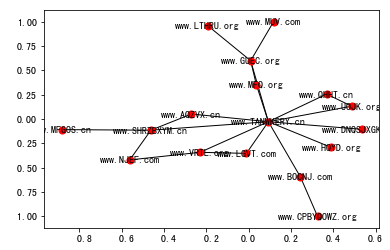

In [226]:
websites_connection = {
    random_websites[0]:random.sample(random_websites,8),
    random_websites[1]:random.sample(random_websites,2),
    random_websites[2]:random.sample(random_websites,3),
    random_websites[3]:random.sample(random_websites,4),
    random_websites[4]:random.sample(random_websites,5),
    random_websites[5]:random.sample(random_websites,1),    
}
    
import networkx as nx
websites_networks = nx.graph.Graph(websites_connection)
nx.draw_networkx(websites_networks, font_size = 10, node_size = 50 )

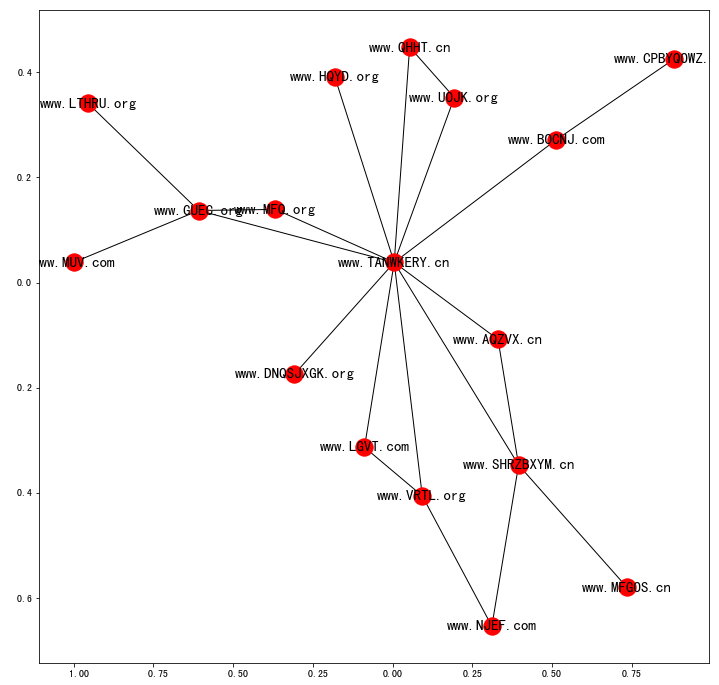

In [228]:
plt.figure(3,figsize=(12,12))  #查一查这个
nx.draw_networkx(websites_networks, font_size = 15)

In [230]:
sorted(nx.pagerank(websites_networks), key=lambda x: x[1], reverse=True) 
#Rank websites according their's pagerank values

['www.TANWKERY.cn',
 'www.BOCNJ.com',
 'www.VRTL.org',
 'www.SHRZBXYM.cn',
 'www.GUEC.org',
 'www.QHHT.cn',
 'www.UOJK.org',
 'www.HQYD.org',
 'www.LGVT.com',
 'www.MFQ.org',
 'www.DNQSJXGK.org',
 'www.AQZVX.cn',
 'www.CPBYQOWZ.org',
 'www.NJEF.com',
 'www.MFGOS.cn',
 'www.MUV.com',
 'www.LTHRU.org']